# Project 1: SAT & ACT Analysis

Liew Woei Ginn
GA, DSI8
24 May, 2019

## Problem Statement

What can be learned from ACT & SAT 2017/2018 data, and how can we gain insights to improve SAT Participation rates?


## Executive Summary

In this project, we documented the process of obtaining text-based data, cleaning via Pandas and plotting data to extract insights. By utilizing Seasborn/Matplotlib visualization, data is displayed in queries, histograms, boxplots and scatterplots.

### Contents:
#### [2017/18 Data Import & Cleaning]
- Scrubbing for errors in the datatypes
- Spot outliers
#### [Exploratory Data Analysis] 
- ACT vs SAT scores
- Participation rate vs scores
- Changes in scores and rates
#### [Data Visualization]
- Refer to charts
#### [Descriptive and Inferential Statistics]
#### [Outside Research]
#### [Conclusions and Recommendations]

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*
 

In [79]:
#Library Imports:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data 

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [80]:
import os
print("pwd=" + os.getcwd())

pwd=/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code


In [81]:
#Code:
dfsat2017 = pd.read_csv("/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/sat_2017.csv")
dfact2017 = pd.read_csv('/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [82]:
#Code:
print(dfsat2017.head(10))
print(dfact2017.head(10))


                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

dfsat2017:
SAT consist of 2 subjects and a total score. 

dfact2017:
ACT consist of 4 subjects and a composite score. 

#### 4a. Does the data look complete? 

In [91]:
print(dfsat2017.info())
print(dfact2017.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB
None


Answer: 

SAT data consist of 51 records with no null values.
ACT data consist of 52 records with no null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [95]:
print(dfsat2017[['Evidence-Based Reading and Writing','Math']].min())
print(dfsat2017[['Evidence-Based Reading and Writing','Math']].max())

Evidence-Based Reading and Writing    482
Math                                   52
dtype: int64
Evidence-Based Reading and Writing    644
Math                                  651
dtype: int64


In [99]:
print(dfact2017[['English','Math','Reading','Science']].min())
print(dfact2017[['English','Math','Reading','Science']].max())

English    16.3
Math       18.0
Reading    18.1
Science     2.3
dtype: float64
English    25.5
Math       25.3
Reading    26.0
Science    24.9
dtype: float64


In [104]:
dfsat2017

State Participation  Evidence-Based Reading and Writing  \
0                Alabama            5%                                 593   
1                 Alaska           38%                                 547   
2                Arizona           30%                                 563   
3               Arkansas            3%                                 614   
4             California           53%                                 531   
5               Colorado           11%                                 606   
6            Connecticut          100%                                 530   
7               Delaware          100%                                 503   
8   District of Columbia          100%                                 482   
9                Florida           83%                                 520   
10               Georgia           61%                                 535   
11                Hawaii           55%                                 544   
12                 Idaho           93%                                 513   
13              Illinois            9%                                 559   
14               Indiana           63%                                 542   
15                  Iowa            2%                                 641   
16                Kansas            4%                                 632   
17              Kentucky            4%                                 631   
18             Louisiana            4%                                 611   
19                 Maine           95%                                 513   
20              Maryland           69%                                 536   
21         Massachusetts           76%                                 555   
22              Michigan          100%                                 509   
23             Minnesota            3%                                 644   
24           Mississippi            2%                                 634   
25              Missouri            3%                                 640   
26               Montana           10%                                 605   
27              Nebraska            3%                                 629   
28                Nevada           26%                                 563   
29         New Hampshire           96%                                 532   
30            New Jersey           70%                                 530   
31            New Mexico           11%                                 577   
32              New York           67%                                 528   
33        North Carolina           49%                                 546   
34          North Dakota            2%                                 635   
35                  Ohio           12%                                 578   
36              Oklahoma            7%                                 530   
37                Oregon           43%                                 560   
38          Pennsylvania           65%                                 540   
39          Rhode Island           71%                                 539   
40        South Carolina           50%                                 543   
41          South Dakota            3%                                 612   
42             Tennessee            5%                                 623   
43                 Texas           62%                                 513   
44                  Utah            3%                                 624   
45               Vermont           60%                                 562   
46              Virginia           65%                                 561   
47            Washington           64%                                 541   
48         West Virginia           14%                                 558   
49             Wisconsin            3%                                 642   
50               Wyoming            3%   

In [107]:
display(dfsat2017)
display(dfact2017)

State Participation  Evidence-Based Reading and Writing  \
0                Alabama            5%                                 593   
1                 Alaska           38%                                 547   
2                Arizona           30%                                 563   
3               Arkansas            3%                                 614   
4             California           53%                                 531   
5               Colorado           11%                                 606   
6            Connecticut          100%                                 530   
7               Delaware          100%                                 503   
8   District of Columbia          100%                                 482   
9                Florida           83%                                 520   
10               Georgia           61%                                 535   
11                Hawaii           55%                                 544   
12                 Idaho           93%                                 513   
13              Illinois            9%                                 559   
14               Indiana           63%                                 542   
15                  Iowa            2%                                 641   
16                Kansas            4%                                 632   
17              Kentucky            4%                                 631   
18             Louisiana            4%                                 611   
19                 Maine           95%                                 513   
20              Maryland           69%                                 536   
21         Massachusetts           76%                                 555   
22              Michigan          100%                                 509   
23             Minnesota            3%                                 644   
24           Mississippi            2%                                 634   
25              Missouri            3%                                 640   
26               Montana           10%                                 605   
27              Nebraska            3%                                 629   
28                Nevada           26%                                 563   
29         New Hampshire           96%                                 532   
30            New Jersey           70%                                 530   
31            New Mexico           11%                                 577   
32              New York           67%                                 528   
33        North Carolina           49%                                 546   
34          North Dakota            2%                                 635   
35                  Ohio           12%                                 578   
36              Oklahoma            7%                                 530   
37                Oregon           43%                                 560   
38          Pennsylvania           65%                                 540   
39          Rhode Island           71%                                 539   
40        South Carolina           50%                                 543   
41          South Dakota            3%                                 612   
42             Tennessee            5%                                 623   
43                 Texas           62%                                 513   
44                  Utah            3%                                 624   
45               Vermont           60%                                 562   
46              Virginia           65%                                 561   
47            Washington           64%                                 541   
48         West Virginia           14%                                 558   
49             Wisconsin            3%                                 642   
50               Wyoming            3%   

State Participation  English  Math  Reading  Science  \
0               National           60%     20.3  20.7     21.4     21.0   
1                Alabama          100%     18.9  18.4     19.7     19.4   
2                 Alaska           65%     18.7  19.8     20.4     19.9   
3                Arizona           62%     18.6  19.8     20.1     19.8   
4               Arkansas          100%     18.9  19.0     19.7     19.5   
5             California           31%     22.5  22.7     23.1     22.2   
6               Colorado          100%     20.1  20.3     21.2     20.9   
7            Connecticut           31%     25.5  24.6     25.6     24.6   
8               Delaware           18%     24.1  23.4     24.8     23.6   
9   District of Columbia           32%     24.4  23.5     24.9     23.5   
10               Florida           73%     19.0  19.4     21.0     19.4   
11               Georgia           55%     21.0  20.9     22.0     21.3   
12                Hawaii           90%     17.8  19.2     19.2     19.3   
13                 Idaho           38%     21.9  21.8     23.0     22.1   
14              Illinois           93%     21.0  21.2     21.6     21.3   
15               Indiana           35%     22.0  22.4     23.2     22.3   
16                  Iowa           67%     21.2  21.3     22.6     22.1   
17                Kansas           73%     21.1  21.3     22.3     21.7   
18              Kentucky          100%     19.6  19.4     20.5     20.1   
19             Louisiana          100%     19.4  18.8     19.8     19.6   
20                 Maine            8%     24.2  24.0     24.8     23.7   
21              Maryland           28%     23.3  23.1     24.2      2.3   
22         Massachusetts           29%     25.4  25.3     25.9     24.7   
23              Michigan           29%     24.1  23.7     24.5     23.8   
24             Minnesota          100%     20.4  21.5     21.8     21.6   
25           Mississippi          100%     18.2  18.1     18.8     18.8   
26              Missouri          100%     19.8  19.9     20.8     20.5   
27               Montana          100%     19.0  20.2     21.0     20.5   
28              Nebraska           84%     20.9  20.9     21.9     21.5   
29                Nevada          100%     16.3  18.0     18.1     18.2   
30         New Hampshire           18%     25.4  25.1     26.0     24.9   
31            New Jersey           34%     23.8  23.8     24.1     23.2   
32            New Mexico           66%     18.6  19.4     20.4     20.0   
33              New York           31%     23.8  24.0     24.6     23.9   
34        North Carolina          100%     17.8  19.3     19.6     19.3   
35          North Dakota           98%     19.0  20.4     20.5     20.6   
36                  Ohio           75%     21.2  21.6     22.5     22.0   
37              Oklahoma          100%     18.5  18.8     20.1     19.6   
38                Oregon           40%     21.2  21.5     22.4     21.7   
39          Pennsylvania           23%     23.4  23.4     24.2     23.3   
40          Rhode Island           21%     24.0  23.3     24.7     23.4   
41        South Carolina          100%     17.5  18.6     19.1     18.9   
42          South Dakota           80%     20.7  21.5     22.3     22.0   
43             Tennessee          100%     19.5  19.2     20.1     19.9   
44                 Texas           45%     19.5  20.7     21.1     20.9   
45                  Utah          100%     19.5  19.9     20.8     20.6   
46               Vermont           29%     23.3  23.1     24.4     23.2   
47              Virginia           29%     23.5  23.3     24.6     23.5   
48            Washington           29%     20.9  21.9     22.1     22.0   
49         West Virginia           69%     20.0  19.4     21.2     20.5   
50             Wisconsin          100%     19.7  20.4     20.6     20.9   
51               Wyoming          100%     19.4  19.8     20.8     20.6   

   Composite  
0       21.0  
1       19.2 

Answer: 

SAT 2017 - Wyoming: 
Math minium score of 52 is out of range as test score range is 200-800.
ACT 2017 - Maryland:
Reference to the Composite score, Science score of 2.3 seems errorneous.
ACT 2017 - Wyoming:
Typo of 'x' is included in the Composite score 


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:

#code
#use python to change the errors you found in the source files

# Update 2017 Wyoming ACT Composite scores to 20.2
dfact2017.loc[51, 'Composite'] = 20.2

# Update 2017 Maryland Science Composite scores to 23
dfact2017.loc[21, 'Science'] = 23.0

# Update 2017 Wyoming Math Composite scores to 23
dfsat2017.loc[20, 'Math'] = 524
dfact2017



State Participation  English  Math  Reading  Science  \
0               National           60%     20.3  20.7     21.4     21.0   
1                Alabama          100%     18.9  18.4     19.7     19.4   
2                 Alaska           65%     18.7  19.8     20.4     19.9   
3                Arizona           62%     18.6  19.8     20.1     19.8   
4               Arkansas          100%     18.9  19.0     19.7     19.5   
5             California           31%     22.5  22.7     23.1     22.2   
6               Colorado          100%     20.1  20.3     21.2     20.9   
7            Connecticut           31%     25.5  24.6     25.6     24.6   
8               Delaware           18%     24.1  23.4     24.8     23.6   
9   District of Columbia           32%     24.4  23.5     24.9     23.5   
10               Florida           73%     19.0  19.4     21.0     19.4   
11               Georgia           55%     21.0  20.9     22.0     21.3   
12                Hawaii           90%     17.8  19.2     19.2     19.3   
13                 Idaho           38%     21.9  21.8     23.0     22.1   
14              Illinois           93%     21.0  21.2     21.6     21.3   
15               Indiana           35%     22.0  22.4     23.2     22.3   
16                  Iowa           67%     21.2  21.3     22.6     22.1   
17                Kansas           73%     21.1  21.3     22.3     21.7   
18              Kentucky          100%     19.6  19.4     20.5     20.1   
19             Louisiana          100%     19.4  18.8     19.8     19.6   
20                 Maine            8%     24.2  24.0     24.8     23.7   
21              Maryland           28%     23.3  23.1     24.2     23.0   
22         Massachusetts           29%     25.4  25.3     25.9     24.7   
23              Michigan           29%     24.1  23.7     24.5     23.8   
24             Minnesota          100%     20.4  21.5     21.8     21.6   
25           Mississippi          100%     18.2  18.1     18.8     18.8   
26              Missouri          100%     19.8  19.9     20.8     20.5   
27               Montana          100%     19.0  20.2     21.0     20.5   
28              Nebraska           84%     20.9  20.9     21.9     21.5   
29                Nevada          100%     16.3  18.0     18.1     18.2   
30         New Hampshire           18%     25.4  25.1     26.0     24.9   
31            New Jersey           34%     23.8  23.8     24.1     23.2   
32            New Mexico           66%     18.6  19.4     20.4     20.0   
33              New York           31%     23.8  24.0     24.6     23.9   
34        North Carolina          100%     17.8  19.3     19.6     19.3   
35          North Dakota           98%     19.0  20.4     20.5     20.6   
36                  Ohio           75%     21.2  21.6     22.5     22.0   
37              Oklahoma          100%     18.5  18.8     20.1     19.6   
38                Oregon           40%     21.2  21.5     22.4     21.7   
39          Pennsylvania           23%     23.4  23.4     24.2     23.3   
40          Rhode Island           21%     24.0  23.3     24.7     23.4   
41        South Carolina          100%     17.5  18.6     19.1     18.9   
42          South Dakota           80%     20.7  21.5     22.3     22.0   
43             Tennessee          100%     19.5  19.2     20.1     19.9   
44                 Texas           45%     19.5  20.7     21.1     20.9   
45                  Utah          100%     19.5  19.9     20.8     20.6   
46               Vermont           29%     23.3  23.1     24.4     23.2   
47              Virginia           29%     23.5  23.3     24.6     23.5   
48            Washington           29%     20.9  21.9     22.1     22.0   
49         West Virginia           69%     20.0  19.4     21.2     20.5   
50             Wisconsin          100%     19.7  20.4     20.6     20.9   
51               Wyoming          100%     19.4  19.8     20.8     20.6   

   Composite  
0       21.0  
1       19.2 

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
#code
print(dfsat2017.dtypes)
print("")
print(dfact2017.dtypes)


State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
sat2017:  Data type for Participation should be a float
act2017:  Data type for Participation and Composite should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [7]:
def strip(x):
    return x.str.strip("%").astype(float)/100
dfsat2017["Participation"] = strip(dfsat2017["Participation"])
dfsat2017.head()

State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama           0.05                                 593   572   1165
1      Alaska           0.38                                 547   533   1080
2     Arizona           0.30                                 563   553   1116
3    Arkansas           0.03                                 614   594   1208
4  California           0.53                                 531   524   1055

In [8]:
dfact2017["Participation"] = strip(dfact2017["Participation"])
dfact2017.head()

State  Participation  English  Math  Reading  Science Composite
0  National           0.60     20.3  20.7     21.4     21.0      21.0
1   Alabama           1.00     18.9  18.4     19.7     19.4      19.2
2    Alaska           0.65     18.7  19.8     20.4     19.9      19.8
3   Arizona           0.62     18.6  19.8     20.1     19.8      19.7
4  Arkansas           1.00     18.9  19.0     19.7     19.5      19.4

- Fix any individual values preventing other columns from being the appropriate type.

In [9]:
print(dfact2017.dtypes)
print(dfsat2017.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


- Finish your data modifications by making sure the columns are now typed appropriately.

In [10]:
#code
dfact2017["Composite"] = dfact2017["Composite"].astype(float)

- Display the data types again to confirm they are correct.

In [11]:
#Code:
print(dfact2017.dtypes)
print(dfsat2017.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [12]:
#code

dfsat2017.head()
listofnamess17 = ['state','participation_s17', 'reading_s17', 'maths_s17', 'total_s17']
dfsat2017.columns = listofnamess17

listofnamesa17 = ['state', 'participation_a17', 'english_a17', 'math_a17', 'reading_a17', 'science_a17', 'composite_a17']
dfact2017.columns = listofnamesa17

In [13]:
print(dfsat2017.head())
print(dfact2017.head())

        state  participation_s17  reading_s17  maths_s17  total_s17
0     Alabama               0.05          593        572       1165
1      Alaska               0.38          547        533       1080
2     Arizona               0.30          563        553       1116
3    Arkansas               0.03          614        594       1208
4  California               0.53          531        524       1055
      state  participation_a17  english_a17  math_a17  reading_a17  \
0  National               0.60         20.3      20.7         21.4   
1   Alabama               1.00         18.9      18.4         19.7   
2    Alaska               0.65         18.7      19.8         20.4   
3   Arizona               0.62         18.6      19.8         20.1   
4  Arkansas               1.00         18.9      19.0         19.7   

   science_a17  composite_a17  
0         21.0           21.0  
1         19.4           19.2  
2         19.9           19.8  
3         19.8           19.7  
4         1

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Serial Number|Feature|Type|Dataset|Description|
|---|---|---|---|---|
|1|**state**|*Object*|ACT/SAT|State name of United States|
|2|**participation_a17**|*float*|ACT|Participation rate 2017 *(%)*|
|3|**englist_a17**|*float*|ACT|Mean English Score 2017|
|4|**math_a17**|*float*|ACT|Mean Math Score 2017|
|5|**science_a17**|*float*|ACT|Mean Science Score 2017|
|6|**composite_a17**|*float*|ACT|Mean Composite Score 2017|
|7|**participation_a18**|*float*|ACT|Participation rate 2018*(%)* |
|8|**englist_a18**|*float*|ACT|Mean English Score 2018|
|9|**math_a18**|*float*|ACT|Mean Math Score 2018|
|10|**science_a18**|*float*|ACT|Mean Science Score 2018|
|11|**composite_a18**|*float*|ACT|Mean Composite Score 2018|
|12|**participation_s17**|*float*|SAT|Mean Participation rate 2017*(%)* |
|13|**reading_s17**|*int*|SAT|Mean Evidence-Based Reading and Writing Score 2017|
|14|**maths_s17**|*int*|SAT|Mean Math Score 2018|
|15|**total_s17**|*int*|SAT|Mean Total Score 2018|
|12|**participation_s18**|*float*|SAT|Participation rate 2018*(%)* |
|13|**reading_s18**|*int*|SAT|Mean Evidence-Based Reading and Writing Score 2018|
|14|**maths_s18**|*int*|SAT|Mean Math Score 2018|
|15|**total_s18**|*int*|SAT|Mean Total Score 2018|
|16|**dfact2017**|*dataframe*|ACT|ACT 2017 Dataframe|
|17|**dfact2018**|*dataframe*|ACT|ACT 2018 Dataframe|
|18|**dfsat2017**|*dataframe*|SAT|SAT 2017 Dataframe|
|19|**dfsat2018**|*dataframe*|SAT|SAT 2018 Dataframe|
|20|**combined17**|*dataframe*|SAT & ACT|Combined 2017 SAT & ACT Dataframe|
|21|**combined18**|*dataframe*|SAT & ACT|Combined 2018 SAT & ACT Dataframe|
|22|**final**|*dataframe*|SAT & ACT|Combined 2017/2018 SAT & ACT Dataframe|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [14]:
#code
dfact2017 = dfact2017.drop([0])
print(dfsat2017.shape)
print(dfact2017.shape)
dfact2017


(51, 5)
(51, 7)


state  participation_a17  english_a17  math_a17  \
1                Alabama               1.00         18.9      18.4   
2                 Alaska               0.65         18.7      19.8   
3                Arizona               0.62         18.6      19.8   
4               Arkansas               1.00         18.9      19.0   
5             California               0.31         22.5      22.7   
6               Colorado               1.00         20.1      20.3   
7            Connecticut               0.31         25.5      24.6   
8               Delaware               0.18         24.1      23.4   
9   District of Columbia               0.32         24.4      23.5   
10               Florida               0.73         19.0      19.4   
11               Georgia               0.55         21.0      20.9   
12                Hawaii               0.90         17.8      19.2   
13                 Idaho               0.38         21.9      21.8   
14              Illinois               0.93         21.0      21.2   
15               Indiana               0.35         22.0      22.4   
16                  Iowa               0.67         21.2      21.3   
17                Kansas               0.73         21.1      21.3   
18              Kentucky               1.00         19.6      19.4   
19             Louisiana               1.00         19.4      18.8   
20                 Maine               0.08         24.2      24.0   
21              Maryland               0.28         23.3      23.1   
22         Massachusetts               0.29         25.4      25.3   
23              Michigan               0.29         24.1      23.7   
24             Minnesota               1.00         20.4      21.5   
25           Mississippi               1.00         18.2      18.1   
26              Missouri               1.00         19.8      19.9   
27               Montana               1.00         19.0      20.2   
28              Nebraska               0.84         20.9      20.9   
29                Nevada               1.00         16.3      18.0   
30         New Hampshire               0.18         25.4      25.1   
31            New Jersey               0.34         23.8      23.8   
32            New Mexico               0.66         18.6      19.4   
33              New York               0.31         23.8      24.0   
34        North Carolina               1.00         17.8      19.3   
35          North Dakota               0.98         19.0      20.4   
36                  Ohio               0.75         21.2      21.6   
37              Oklahoma               1.00         18.5      18.8   
38                Oregon               0.40         21.2      21.5   
39          Pennsylvania               0.23         23.4      23.4   
40          Rhode Island               0.21         24.0      23.3   
41        South Carolina               1.00         17.5      18.6   
42          South Dakota               0.80         20.7      21.5   
43             Tennessee               1.00         19.5      19.2   
44                 Texas               0.45         19.5      20.7   
45                  Utah               1.00         19.5      19.9   
46               Vermont               0.29         23.3      23.1   
47              Virginia               0.29         23.5      23.3   
48            Washington               0.29         20.9      21.9   
49         West Virginia               0.69         20.0      19.4   
50             Wisconsin               1.00         19.7      20.4   
51               Wyoming               1.00         19.4      19.8   

    reading_a17  science_a17  composite_a17  
1          19.7         19.4           19.2  
2          20.4         19.9           19.8  
3          20.1         19.8           19.7  
4          19.7         19.5           19.4  
5          23.1         22.2           22.8  
6          21.2         20.9           20.8  
7          25.6         24.6           25.2  
8         

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [15]:
#Code: Pandas merge function

result = pd.merge(dfsat2017,
                 dfact2017[:],
                 on='state',
                 how ='right'
                 )
result

state  participation_s17  reading_s17  maths_s17  \
0                Alabama               0.05          593        572   
1                 Alaska               0.38          547        533   
2                Arizona               0.30          563        553   
3               Arkansas               0.03          614        594   
4             California               0.53          531        524   
5               Colorado               0.11          606        595   
6            Connecticut               1.00          530        512   
7               Delaware               1.00          503        492   
8   District of Columbia               1.00          482        468   
9                Florida               0.83          520        497   
10               Georgia               0.61          535        515   
11                Hawaii               0.55          544        541   
12                 Idaho               0.93          513        493   
13              Illinois               0.09          559        556   
14               Indiana               0.63          542        532   
15                  Iowa               0.02          641        635   
16                Kansas               0.04          632        628   
17              Kentucky               0.04          631        616   
18             Louisiana               0.04          611        586   
19                 Maine               0.95          513        499   
20              Maryland               0.69          536        524   
21         Massachusetts               0.76          555        551   
22              Michigan               1.00          509        495   
23             Minnesota               0.03          644        651   
24           Mississippi               0.02          634        607   
25              Missouri               0.03          640        631   
26               Montana               0.10          605        591   
27              Nebraska               0.03          629        625   
28                Nevada               0.26          563        553   
29         New Hampshire               0.96          532        520   
30            New Jersey               0.70          530        526   
31            New Mexico               0.11          577        561   
32              New York               0.67          528        523   
33        North Carolina               0.49          546        535   
34          North Dakota               0.02          635        621   
35                  Ohio               0.12          578        570   
36              Oklahoma               0.07          530        517   
37                Oregon               0.43          560        548   
38          Pennsylvania               0.65          540        531   
39          Rhode Island               0.71          539        524   
40        South Carolina               0.50          543        521   
41          South Dakota               0.03          612        603   
42             Tennessee               0.05          623        604   
43                 Texas               0.62          513        507   
44                  Utah               0.03          624        614   
45               Vermont               0.60          562        551   
46              Virginia               0.65          561        541   
47            Washington               0.64          541        534   
48         West Virginia               0.14          558        528   
49             Wisconsin               0.03          642        649   
50               Wyoming               0.03          626        604   

    total_s17  participation_a17  english_a17  math_a17  reading_a17  \
0        1165               1.00         18.9      18.4         19.7   
1        1080               0.65         18.7      19.8         20.4   
2        1116               0.62         18.6      19.8         20.1   
3        1208               1.00      

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [16]:
#code
type(result)
result.to_csv('/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [17]:
#export 2018 ACT/SAT data
dfsat2018 = pd.read_csv("/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/sat_2018.csv")
dfact2018 = pd.read_csv('/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/act_2018.csv')

print(dfsat2018.dtypes)
print(dfact2018.head())

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
        State  Participation  Composite  English  Math  Reading  Science
0     Alabama            100       19.1     18.9  18.3     19.6     19.0
1      Alaska             33       20.8     19.8  20.6     21.6     20.7
2     Arizona             66       19.2     18.2  19.4     19.5     19.2
3    Arkansas            100       19.4     19.1  18.9     19.7     19.4
4  California             27       22.7     22.5  22.5     23.0     22.1


In [18]:
# Change datatype and change to decimal for ACT 2018 participation
dfact2018['Participation'] = dfact2018['Participation'].astype(float)/100
# Change datatype and stripping % for SAT 2018 participation
dfsat2018["Participation"] = strip(dfsat2018["Participation"])


print(dfsat2018.dtypes)
print(dfact2018.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object


In [19]:
#Checking 2018 files data
print(dfact2018.shape)
print(dfact2018.tail())
print(dfsat2018.shape)

(52, 7)
            State  Participation  Composite  English  Math  Reading  Science
47     Washington           0.24       22.2     21.4  22.2     22.7     22.0
48  West Virginia           0.65       20.3     19.8  19.4     21.3     20.4
49      Wisconsin           1.00       20.5     19.8  20.3     20.6     20.8
50        Wyoming           1.00       20.0     19.0  19.7     20.6     20.3
51       National           0.55       20.8     20.2  20.5     21.3     20.7
(51, 5)


In [20]:
#removal of excess row 51 National
dfact2018 = dfact2018.drop([51])
print(dfact2018.shape)
print(dfact2018.tail())

(51, 7)
            State  Participation  Composite  English  Math  Reading  Science
46       Virginia           0.24       23.9     23.8  23.3     24.7     23.5
47     Washington           0.24       22.2     21.4  22.2     22.7     22.0
48  West Virginia           0.65       20.3     19.8  19.4     21.3     20.4
49      Wisconsin           1.00       20.5     19.8  20.3     20.6     20.8
50        Wyoming           1.00       20.0     19.0  19.7     20.6     20.3


In [78]:
# update column names for SAT 2018
listofnamess18 = ['state','participation_s18', 'reading_s18', 'maths_s18', 'total_s18']
dfsat2018.columns = listofnamess18
print(dfsat2018.head())

# update column names for ACT 2018
listofnamesa18 = ['state', 'participation_a18', 'english_a18', 'math_a18', 'reading_a18', 'science_a18', 'composite_a18']
dfact2018.columns = listofnamesa18
print(dfact2018.head())



        state  participation_s18  reading_s18  maths_s18  total_s18
0     Alabama               0.06          595        571       1166
1      Alaska               0.43          562        544       1106
2     Arizona               0.29          577        572       1149
3    Arkansas               0.05          592        576       1169
4  California               0.60          540        536       1076
        state  participation_a18  english_a18  math_a18  reading_a18  \
0     Alabama               1.00         19.1      18.9         18.3   
1      Alaska               0.33         20.8      19.8         20.6   
2     Arizona               0.66         19.2      18.2         19.4   
3    Arkansas               1.00         19.4      19.1         18.9   
4  California               0.27         22.7      22.5         22.5   

   science_a18  composite_a18  
0         19.6           19.0  
1         21.6           20.7  
2         19.5           19.2  
3         19.7           19.4  

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [22]:
#Merging SAT & ACT 2018
result2 = pd.merge(dfsat2018,
                 dfact2018[:],
                 on='state',
                 how ='right')
result2.head()


state  participation_s18  reading_s18  maths_s18  total_s18  \
0     Alabama               0.06          595        571       1166   
1      Alaska               0.43          562        544       1106   
2     Arizona               0.29          577        572       1149   
3    Arkansas               0.05          592        576       1169   
4  California               0.60          540        536       1076   

   participation_a18  english_a18  math_a18  reading_a18  science_a18  \
0               1.00         19.1      18.9         18.3         19.6   
1               0.33         20.8      19.8         20.6         21.6   
2               0.66         19.2      18.2         19.4         19.5   
3               1.00         19.4      19.1         18.9         19.7   
4               0.27         22.7      22.5         22.5         23.0   

   composite_a18  
0           19.0  
1           20.7  
2           19.2  
3           19.4  
4           22.1

In [23]:
#export CSV
result2.to_csv(r'/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/combined_2018.csv', index = False)

In [24]:
# Extract combined 2017 and 2018 data
combined17 = pd.read_csv('/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/combined_2017.csv')
combined18 = pd.read_csv('/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/combined_2018.csv')

In [26]:
# Merging of 2017 and 2018 data files
final = pd.merge(combined17,
                 combined18[:],
                 on='state',
                )
final.to_csv('/Users/ginn/Documents/GitHub/classes/projects1234/project_1/code/final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [27]:
#Code:
final.describe().T

count         mean        std     min       25%      50%  \
participation_s17   51.0     0.398039   0.352766    0.02     0.040     0.38   
reading_s17         51.0   569.117647  45.666901  482.00   533.500   559.00   
maths_s17           51.0   556.882353  47.121395  468.00   523.500   548.00   
total_s17           51.0  1126.098039  92.494812  950.00  1055.500  1107.00   
participation_a17   51.0     0.652549   0.321408    0.08     0.310     0.69   
english_a17         51.0    20.931373   2.353677   16.30    19.000    20.70   
math_a17            51.0    21.182353   1.981989   18.00    19.400    20.90   
reading_a17         51.0    22.013725   2.067271   18.10    20.450    21.80   
science_a17         51.0    21.447059   1.735552   18.20    19.950    21.30   
composite_a17       51.0    21.519608   2.020695   17.80    19.800    21.40   
participation_s18   51.0     0.466275   0.380142    0.02     0.045     0.52   
reading_s18         51.0   566.980392  45.515927  497.00   534.500   552.00   
maths_s18           51.0   557.039216  49.065654  480.00   520.000   547.00   
total_s18           51.0  1124.019608  94.277779  977.00  1057.500  1099.00   
participation_a18   51.0     0.616471   0.340810    0.07     0.285     0.66   
english_a18         51.0    21.486275   2.106278   17.70    19.950    21.30   
math_a18            51.0    20.988235   2.446356   16.60    19.100    20.20   
reading_a18         51.0    21.125490   2.035765   17.80    19.400    20.70   
science_a18         51.0    22.015686   2.167245   18.00    20.450    21.60   
composite_a18       51.0    21.345098   1.870114   17.90    19.850    21.10   

                        75%     max  
participation_s17     0.660     1.0  
reading_s17         613.000   644.0  
maths_s17           599.000   651.0  
total_s17          1212.000  1295.0  
participation_a17     1.000     1.0  
english_a17          23.300    25.5  
math_a17             23.100    25.3  
reading_a17          24.150    26.0  
science_a17          23.100    24.9  
composite_a17        23.600    25.5  
participation_s18     0.795     1.0  
reading_s18         616.500   643.0  
maths_s18           600.500   655.0  
total_s18          1220.000  1298.0  
participation_a18     1.000     1.0  
english_a18          23.550    25.6  
math_a18             23.700    26.0  
reading_a18          23.150    25.2  
science_a18          24.100    26.1  
composite_a18        23.050    24.9

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [28]:
#Step 1: Find the mean.
#Step 2: For each data point, find the square of its distance to the mean.
#Step 3: Sum the values from Step 2.
#Step 4: Divide by the number of data points.
#Step 5: Take the square root.

In [29]:
import math
q = [1,3,4,6,9,19]
mean = float(sum(q))/len(q)
print("Mean :",mean)
dev = []
for x in q:
    dev.append(x - mean)
print("Mean - Xi:",dev)
sqr = []
for x in dev:
    sqr.append(x * x)
print('Square of (Mean - X):',sqr)
var = sum(sqr)/len(sqr)
print('Sum of Square of (Mean - X)/N:',var)
standard_dev = math.sqrt(sum(sqr)/(len(sqr)-1))
print("the standard deviation of set %s is %f" % (q, standard_dev) )

Mean : 7.0
Mean - Xi: [-6.0, -4.0, -3.0, -1.0, 2.0, 12.0]
Square of (Mean - X): [36.0, 16.0, 9.0, 1.0, 4.0, 144.0]
Sum of Square of (Mean - X)/N: 35.0
the standard deviation of set [1, 3, 4, 6, 9, 19] is 6.480741


In [30]:
def stdev(q):
    mean = float(sum(q))/len(q)
    #print("Mean :",mean)
    dev = []
    for x in q:
        dev.append(x - mean)
    #print("Mean - Xi:",dev)
    sqr = []
    for x in dev:
        sqr.append(x * x)
    #print('Square of (Mean - X):',sqr)
    var = sum(sqr)/len(sqr)
    #print('Sum of Square of (Mean - X)/N:',var)
    standard_dev = math.sqrt(sum(sqr)/(len(sqr)-1))
    return standard_dev
    #return("the standard deviation of set %s is %f" % (q, standard_dev) )

In [31]:
# Manual calculation
stdev([1,3,4,6,9,19])

6.48074069840786

In [32]:
# System calculation
import statistics as st
q = [1,3,4,6,9,19]
st.stdev(q)


6.48074069840786

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [33]:
#combined.head()
#combined.participation_s17 = stdev(combined.participation_s17)
#combined.assign(temp_f=lambda x: stdev(x['participation_s17'])
#sd = {combined.column}stdev(combined.english_s17)

num_cols = ['participation_s17', 'reading_s17', 'maths_s17', 'total_s17',
       'participation_a17', 'english_a17', 'math_a17', 'reading_a17',
       'science_a17', 'composite_a17', 'participation_s18', 'reading_s18',
       'maths_s18', 'total_s18', 'participation_a18', 'english_a18',
       'math_a18', 'reading_a18', 'science_a18', 'composite_a18']

sd = {k:stdev(final[k]) for k in num_cols}
sd

{'participation_s17': 0.35276632270013036,
 'reading_s17': 45.66690138768932,
 'maths_s17': 47.12139516560329,
 'total_s17': 92.49481172519046,
 'participation_a17': 0.32140842015886834,
 'english_a17': 2.35367713980303,
 'math_a17': 1.9819894936505533,
 'reading_a17': 2.0672706264873146,
 'science_a17': 1.7355521243888319,
 'composite_a17': 2.020694891154341,
 'participation_s18': 0.380141872380898,
 'reading_s18': 45.51592696895382,
 'maths_s18': 49.06565429475642,
 'total_s18': 94.27777897173404,
 'participation_a18': 0.3408097623567245,
 'english_a18': 2.1062781969951776,
 'math_a18': 2.4463562339793055,
 'reading_a18': 2.035764538177723,
 'science_a18': 2.1672445684804105,
 'composite_a18': 1.8701137639716146}

In [34]:
np.std(final)

participation_s17     0.349291
reading_s17          45.216970
maths_s17            46.657134
total_s17            91.583511
participation_a17     0.318242
english_a17           2.330488
math_a17              1.962462
reading_a17           2.046903
science_a17           1.718453
composite_a17         2.000786
participation_s18     0.376397
reading_s18          45.067483
maths_s18            48.582237
total_s18            93.348911
participation_a18     0.337452
english_a18           2.085526
math_a18              2.422254
reading_a18           2.015707
science_a18           2.145892
composite_a18         1.851689
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: up to 0.001 difference

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [35]:
final[:].agg(['min','max'])
    

state  participation_s17  reading_s17  maths_s17  total_s17  \
min  Alabama               0.02          482        468        950   
max  Wyoming               1.00          644        651       1295   

     participation_a17  english_a17  math_a17  reading_a17  science_a17  ...  \
min               0.08         16.3      18.0         18.1         18.2  ...   
max               1.00         25.5      25.3         26.0         24.9  ...   

     participation_s18  reading_s18  maths_s18  total_s18  participation_a18  \
min               0.02          497        480        977               0.07   
max               1.00          643        655       1298               1.00   

     english_a18  math_a18  reading_a18  science_a18  composite_a18  
min         17.7      16.6         17.8         18.0           17.9  
max         25.6      26.0         25.2         26.1           24.9  

[2 rows x 21 columns]

In [36]:
# highest 2017 SAT participation
#['state', 'participation_s17']
final.loc[:].sort_values(by='participation_s17', ascending=False).head()

state  participation_s17  reading_s17  maths_s17  \
8   District of Columbia               1.00          482        468   
22              Michigan               1.00          509        495   
6            Connecticut               1.00          530        512   
7               Delaware               1.00          503        492   
29         New Hampshire               0.96          532        520   

    total_s17  participation_a17  english_a17  math_a17  reading_a17  \
8         950               0.32         24.4      23.5         24.9   
22       1005               0.29         24.1      23.7         24.5   
6        1041               0.31         25.5      24.6         25.6   
7         996               0.18         24.1      23.4         24.8   
29       1052               0.18         25.4      25.1         26.0   

    science_a17  ...  participation_s18  reading_s18  maths_s18  total_s18  \
8          23.5  ...               0.92          497        480        977   
22         23.8  ...               1.00          511        499       1010   
6          24.6  ...               1.00          535        519       1053   
7          23.6  ...               1.00          505        492        998   
29         24.9  ...               0.96          535        528       1063   

    participation_a18  english_a18  math_a18  reading_a18  science_a18  \
8                0.32         23.6      23.7         22.7         24.4   
22               0.22         24.4      24.5         23.9         24.7   
6                0.26         25.6      26.0         24.8         26.1   
7                0.17         23.2      23.7         23.1         24.5   
29               0.16         25.1      25.1         24.7         25.6   

    composite_a18  
8            23.0  
22           23.9  
6            24.9  
7            23.4  
29           24.4  

[5 rows x 21 columns]

In [189]:
# lowest 2017 SAT participation
final.loc[:].sort_values(by='participation_s17', ascending=False).tail(10)

state  participation_s17  reading_s17  maths_s17  total_s17  \
49     Wisconsin               0.03          642        649       1291   
25      Missouri               0.03          640        631       1271   
41  South Dakota               0.03          612        603       1216   
27      Nebraska               0.03          629        625       1253   
23     Minnesota               0.03          644        651       1295   
3       Arkansas               0.03          614        594       1208   
50       Wyoming               0.03          626        604       1230   
34  North Dakota               0.02          635        621       1256   
24   Mississippi               0.02          634        607       1242   
15          Iowa               0.02          641        635       1275   

    participation_a17  english_a17  math_a17  reading_a17  science_a17  ...  \
49               1.00         19.7      20.4         20.6         20.9  ...   
25               1.00         19.8      19.9         20.8         20.5  ...   
41               0.80         20.7      21.5         22.3         22.0  ...   
27               0.84         20.9      20.9         21.9         21.5  ...   
23               1.00         20.4      21.5         21.8         21.6  ...   
3                1.00         18.9      19.0         19.7         19.5  ...   
50               1.00         19.4      19.8         20.8         20.6  ...   
34               0.98         19.0      20.4         20.5         20.6  ...   
24               1.00         18.2      18.1         18.8         18.8  ...   
15               0.67         21.2      21.3         22.6         22.1  ...   

    maths_s18  total_s18  participation_a18  english_a18  math_a18  \
49        653       1294               1.00         20.5      19.8   
25        629       1262               1.00         20.0      19.5   
41        618       1240               0.77         21.9      20.8   
27        623       1252               1.00         20.1      19.4   
23        655       1298               0.99         21.3      20.2   
3         576       1169               1.00         19.4      19.1   
50        625       1258               1.00         20.0      19.0   
34        643       1283               0.98         20.3      19.1   
24        606       1236               1.00         18.6      18.2   
15        631       1265               0.68         21.8      21.0   

    reading_a18  science_a18  composite_a18  participation_schange  \
49         20.3         20.6           20.8                   0.00   
25         19.7         20.5           20.0                   0.01   
41         21.6         22.4           22.2                   0.00   
27         19.8         20.4           20.1                   0.00   
23         21.4         21.7           21.4                   0.01   
3          18.9         19.7           19.4                   0.02   
50         19.7         20.6           20.3                   0.00   
34         20.3         20.7           20.5                   0.00   
24         18.1         18.9           18.6                   0.01   
15         21.2         22.5           22.0                   0.01   

    participation_achange  
49                   0.00  
25                   0.00  
41                  -0.03  
27                   0.16  
23                  -0.01  
3                    0.00  
50                   0.00  
34                   0.00  
24                   0.00  
15                   0.01  

[10 rows x 23 columns]

In [110]:
# highest 2018 SAT participation
final.loc[:, ['state', 'participation_s18']].sort_values(by='participation_s18', ascending=False).head(6)

state  participation_s18
5      Colorado               1.00
6   Connecticut               1.00
7      Delaware               1.00
22     Michigan               1.00
12        Idaho               1.00
19        Maine               0.99

In [186]:
# lowest 2018 SAT participation
final.loc[:, ['state', 'participation_s18']].sort_values(by='participation_s18', ascending=True).head(10)

state  participation_s18
34  North Dakota               0.02
50       Wyoming               0.03
41  South Dakota               0.03
27      Nebraska               0.03
49     Wisconsin               0.03
24   Mississippi               0.03
15          Iowa               0.03
44          Utah               0.04
23     Minnesota               0.04
18     Louisiana               0.04

In [40]:
# lowest 2018 SAT participation
final.loc[:, ['state', 'participation_s17']].sort_values(by='participation_s17', ascending=True).head()

state  participation_s17
34  North Dakota               0.02
24   Mississippi               0.02
15          Iowa               0.02
25      Missouri               0.03
44          Utah               0.03

In [41]:
# highest 2017 ACT participation
final.loc[:, ['state', 'participation_a17']].sort_values(by='participation_a17', ascending=False).head()

state  participation_a17
0     Alabama                1.0
17   Kentucky                1.0
49  Wisconsin                1.0
44       Utah                1.0
42  Tennessee                1.0

In [190]:
# lowest 2017 ACT participation
final.loc[:, ['state', 'participation_a17']].sort_values(by='participation_a17', ascending=True).head(10)

state  participation_a17
19          Maine               0.08
29  New Hampshire               0.18
7        Delaware               0.18
39   Rhode Island               0.21
38   Pennsylvania               0.23
20       Maryland               0.28
45        Vermont               0.29
21  Massachusetts               0.29
22       Michigan               0.29
46       Virginia               0.29

In [42]:
# highest 2018 ACT participation
final.loc[:, ['state', 'participation_a18']].sort_values(by='participation_a18', ascending=False).head()

state  participation_a18
0     Alabama                1.0
17   Kentucky                1.0
49  Wisconsin                1.0
44       Utah                1.0
42  Tennessee                1.0

In [191]:
# lowest 2018 ACT participation
final.loc[:, ['state', 'participation_a18']].sort_values(by='participation_a18', ascending=True).head(10)

state  participation_a18
19          Maine               0.07
39   Rhode Island               0.15
29  New Hampshire               0.16
7        Delaware               0.17
38   Pennsylvania               0.20
22       Michigan               0.22
47     Washington               0.24
45        Vermont               0.24
46       Virginia               0.24
21  Massachusetts               0.25

In [45]:
# highest 2017 SAT total 
final.loc[:, ['state', 'total_s17']].sort_values(by='total_s17', ascending=False).head()

state  total_s17
23  Minnesota       1295
49  Wisconsin       1291
15       Iowa       1275
25   Missouri       1271
16     Kansas       1260

In [46]:
# highest 2018 SAT total 
final.loc[:, ['state', 'total_s18']].sort_values(by='total_s18', ascending=False).head()

state  total_s18
23     Minnesota       1298
49     Wisconsin       1294
34  North Dakota       1283
15          Iowa       1265
16        Kansas       1264

In [47]:
# lowest 2017 SAT total 
final.loc[:, ['state', 'total_s17']].sort_values(by='total_s17', ascending=True).head()

state  total_s17
8   District of Columbia        950
7               Delaware        996
12                 Idaho       1005
22              Michigan       1005
19                 Maine       1012

In [48]:
# lowset 2018 SAT total 
final.loc[:, ['state', 'total_s18']].sort_values(by='total_s18', ascending=True).head()

state  total_s18
8   District of Columbia        977
7               Delaware        998
48         West Virginia        999
12                 Idaho       1001
22              Michigan       1010

In [49]:
# highest 2017 ACT composite
print(final.loc[:, ['state', 'composite_a17']].sort_values(by='composite_a17', ascending=False).head())

                   state  composite_a17
29         New Hampshire           25.5
21         Massachusetts           25.4
6            Connecticut           25.2
19                 Maine           24.3
8   District of Columbia           24.2


In [50]:
# highest 2018 ACT composite
print(final.loc[:, ['state', 'composite_a18']].sort_values(by='composite_a18', ascending=False).head())

            state  composite_a18
6     Connecticut           24.9
21  Massachusetts           24.7
29  New Hampshire           24.4
32       New York           24.2
22       Michigan           23.9


In [51]:
# lowsest 2017 ACT composite
final.loc[:, ['state', 'composite_a17']].sort_values(by='composite_a17', ascending=True).head()

state  composite_a17
28          Nevada           17.8
24     Mississippi           18.6
40  South Carolina           18.7
11          Hawaii           19.0
33  North Carolina           19.1

In [52]:
# lowsest 2018 ACT composite
final.loc[:, ['state', 'composite_a18']].sort_values(by='composite_a18', ascending=True).head()

state  composite_a18
28          Nevada           17.9
40  South Carolina           18.5
24     Mississippi           18.6
0          Alabama           19.0
11          Hawaii           19.0

In [53]:
#Do any states with 100% participation on a given test have a rate change year-to-year?

In [128]:
final["participation_schange"] = final.participation_s18 - final.participation_s17
final['participation_achange'] = final.participation_a18 - final.participation_a17

mask_sat_part = (final.participation_s17 == 1.0) | (final.participation_a17 == 1.0)
mask_ratechange = (final.participation_schange !=0.0) | (final.participation_achange != 0.0)
final[mask_sat_part & mask_ratechange]

state  participation_s17  reading_s17  maths_s17  \
0                Alabama               0.05          593        572   
3               Arkansas               0.03          614        594   
5               Colorado               0.11          606        595   
6            Connecticut               1.00          530        512   
7               Delaware               1.00          503        492   
8   District of Columbia               1.00          482        468   
22              Michigan               1.00          509        495   
23             Minnesota               0.03          644        651   
24           Mississippi               0.02          634        607   
25              Missouri               0.03          640        631   
28                Nevada               0.26          563        553   
33        North Carolina               0.49          546        535   
36              Oklahoma               0.07          530        517   
40        South Carolina               0.50          543        521   
42             Tennessee               0.05          623        604   
44                  Utah               0.03          624        614   

    total_s17  participation_a17  english_a17  math_a17  reading_a17  \
0        1165               1.00         18.9      18.4         19.7   
3        1208               1.00         18.9      19.0         19.7   
5        1201               1.00         20.1      20.3         21.2   
6        1041               0.31         25.5      24.6         25.6   
7         996               0.18         24.1      23.4         24.8   
8         950               0.32         24.4      23.5         24.9   
22       1005               0.29         24.1      23.7         24.5   
23       1295               1.00         20.4      21.5         21.8   
24       1242               1.00         18.2      18.1         18.8   
25       1271               1.00         19.8      19.9         20.8   
28       1116               1.00         16.3      18.0         18.1   
33       1081               1.00         17.8      19.3         19.6   
36       1047               1.00         18.5      18.8         20.1   
40       1064               1.00         17.5      18.6         19.1   
42       1228               1.00         19.5      19.2         20.1   
44       1238               1.00         19.5      19.9         20.8   

    science_a17  ...  maths_s18  total_s18  participation_a18  english_a18  \
0          19.4  ...        571       1166               1.00         19.1   
3          19.5  ...        576       1169               1.00         19.4   
5          20.9  ...        506       1025               0.30         23.9   
6          24.6  ...        519       1053               0.26         25.6   
7          23.6  ...        492        998               0.17         23.2   
8          23.5  ...        480        977               0.32         23.6   
22         23.8  ...        499       1010               0.22         24.4   
23         21.6  ...        655       1298               0.99         21.3   
24         18.8  ...        606       1236               1.00         18.6   
25         20.5  ...        629       1262               1.00         20.0   
28         18.2  ...        566       1140               1.00         17.7   
33         19.3  ...        543       1097               1.00         19.1   
36         19.6  ...        521       1062               1.00         19.3   
40         18.9  ...        512       1043               1.00         18.3   
42         19.9  ...        607       1231               1.00         19.6   
44         20.6  ...        612       1230               1.00         20.4   

    math_a18  reading_a18  science_a18  composite_a18  participation_schange  \
0       18.9         18.3         19.6           19.0                   0.01   
3       19.1         18.9         19.7           19.4                   0.02   
5       23.9       

In [124]:
#Do any states show have >50% participation on both tests either year?
mask50_2017 = (final.participation_s17 > 0.5) & (final.participation_a17 > 0.5)
mask50_2018 = (final.participation_s18 > 0.5) & (final.participation_a18 > 0.5)

final[mask50_2017 | mask50_2018]

state  participation_s17  reading_s17  maths_s17  total_s17  \
9          Florida               0.83          520        497       1017   
10         Georgia               0.61          535        515       1050   
11          Hawaii               0.55          544        541       1085   
33  North Carolina               0.49          546        535       1081   
40  South Carolina               0.50          543        521       1064   

    participation_a17  english_a17  math_a17  reading_a17  science_a17  ...  \
9                0.73         19.0      19.4         21.0         19.4  ...   
10               0.55         21.0      20.9         22.0         21.3  ...   
11               0.90         17.8      19.2         19.2         19.3  ...   
33               1.00         17.8      19.3         19.6         19.3  ...   
40               1.00         17.5      18.6         19.1         18.9  ...   

    maths_s18  total_s18  participation_a18  english_a18  math_a18  \
9         493       1014               0.66         19.9      19.2   
10        522       1064               0.53         21.4      20.9   
11        549       1099               0.89         18.9      18.2   
33        543       1097               1.00         19.1      18.0   
40        512       1043               1.00         18.3      17.3   

    reading_a18  science_a18  composite_a18  participation_schange  \
9          19.3         21.1           19.5                   0.14   
10         20.7         21.2           21.4                   0.09   
11         19.0         19.1           19.0                   0.01   
33         19.3         19.5           19.2                   0.03   
40         18.2         18.6           18.5                   0.05   

    participation_achange  
9                   -0.07  
10                  -0.02  
11                  -0.01  
33                   0.00  
40                   0.00  

[5 rows x 23 columns]

In [131]:

display(final[['state','participation_schange']].sort_values(by = 'participation_schange', ascending = False).head())
display(final[['state','participation_schange']].sort_values(by = 'participation_schange', ascending = False).tail())
display(final[['state','participation_achange']].sort_values(by = 'participation_achange', ascending = False).head())
display(final[['state','participation_achange']].sort_values(by = 'participation_achange', ascending = False).tail())

state  participation_schange
13       Illinois                   0.90
5        Colorado                   0.89
39   Rhode Island                   0.26
48  West Virginia                   0.14
9         Florida                   0.14

state  participation_schange
49             Wisconsin                   0.00
50               Wyoming                   0.00
2                Arizona                  -0.01
28                Nevada                  -0.03
8   District of Columbia                  -0.08

state  participation_achange
35      Ohio                   0.25
27  Nebraska                   0.16
2    Arizona                   0.04
20  Maryland                   0.03
37    Oregon                   0.02

state  participation_achange
9    Florida                  -0.07
22  Michigan                  -0.07
1     Alaska                  -0.32
13  Illinois                  -0.50
5   Colorado                  -0.70

Based on what you've just observed, have you identified any states that you're especially interested in? Make a note of these and state why you think they're interesting.

Answer:
- From 2017/18 Illinois have a SAT participation rate change of 90% and 89% for Colorado. 
- 100% participation rate for Michigan, Connecticut and Delaware for 2017/18.


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

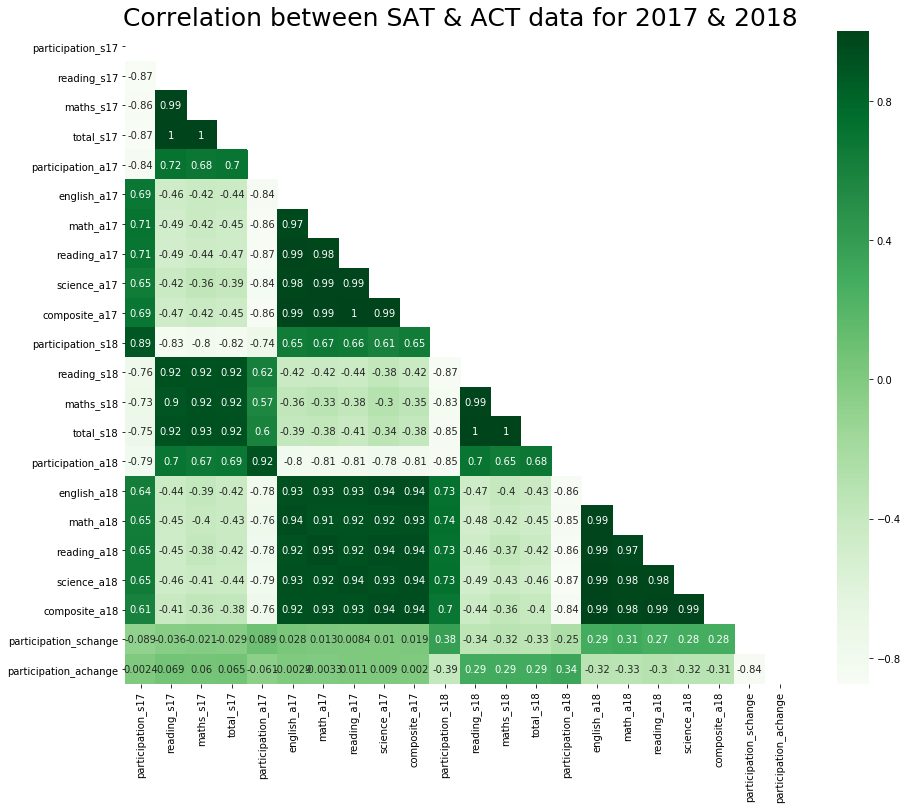

In [139]:
# set size of plot
plt.figure(figsize=(15, 12))

# Generate a mask for the upper triangle
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

# add title to plot
plt.title("Correlation between SAT & ACT data for 2017 & 2018", fontsize = 25)
sns.heatmap(final.corr(), annot=True, cmap='Greens', mask = mask)


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [57]:
#def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#    nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
#    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
#    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [146]:
from scipy import stats
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    plt.figure(figsize=(12,10))
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) # Set xlabels for each subplot
        ax[i].set_ylabel(list_of_ylabels[i]) # Set xlabels for each subplot


In [59]:
print(num_cols)

['participation_s17', 'reading_s17', 'maths_s17', 'total_s17', 'participation_a17', 'english_a17', 'math_a17', 'reading_a17', 'science_a17', 'composite_a17', 'participation_s18', 'reading_s18', 'maths_s18', 'total_s18', 'participation_a18', 'english_a18', 'math_a18', 'reading_a18', 'science_a18', 'composite_a18']


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<Figure size 864x720 with 0 Axes>

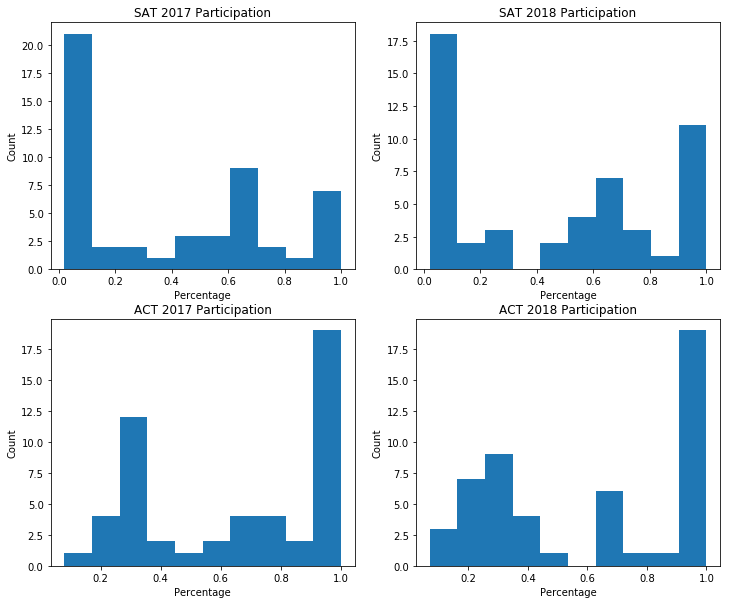

In [147]:
# Code: Participation rates for SAT & ACT

subplot_histograms(final, 
                   list_of_columns=['participation_s17', 'participation_s18', 
                           'participation_a17', 'participation_a18'], 
                   list_of_titles=['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 
                                  'ACT 2018 Participation'], 
                   list_of_xlabels=['Percentage', 'Percentage', 'Percentage', 'Percentage'],
#                    
                   list_of_ylabels=['Count','Count','Count','Count','Count']
                   )

<Figure size 864x720 with 0 Axes>

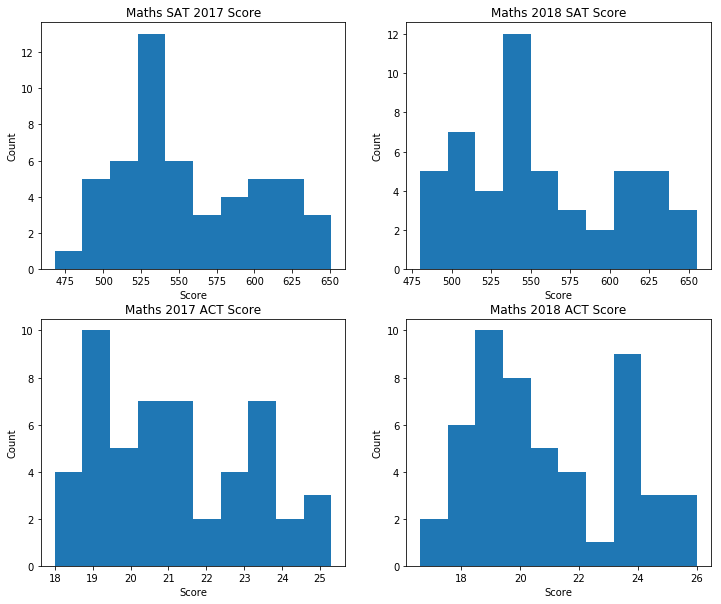

In [148]:
# Code: Math scores for SAT & ACT

subplot_histograms(final, 
                   list_of_columns=['maths_s17', 'maths_s18', 
                           'math_a17', 'math_a18'], 
                   list_of_titles=['Maths SAT 2017 Score', 'Maths 2018 SAT Score', 'Maths 2017 ACT Score', 
                                  'Maths 2018 ACT Score'], 
                   list_of_xlabels=['Score', 'Score','Score','Score'],
#                    
                   list_of_ylabels=['Count','Count','Count','Count','Count']
                   )

<Figure size 864x720 with 0 Axes>

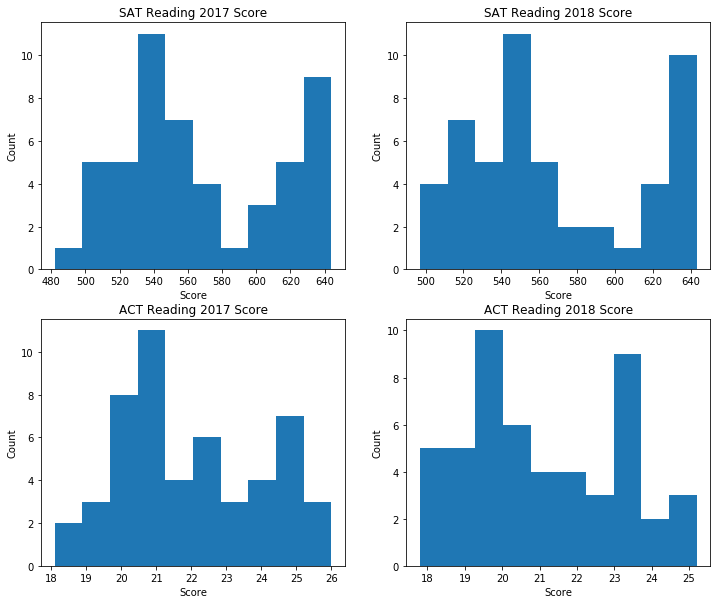

In [149]:
#Reading/verbal scores for SAT & ACT

subplot_histograms(final, 
                   list_of_columns=['reading_s17', 'reading_s18', 
                           'reading_a17', 'reading_a18'], 
                   list_of_titles=['SAT Reading 2017 Score', 'SAT Reading 2018 Score', 'ACT Reading 2017 Score', 
                                  'ACT Reading 2018 Score'], 
                   list_of_xlabels=['Score', 'Score','Score','Score'],
#                    
                   list_of_ylabels=['Count','Count','Count','Count','Count']
                   )

<Figure size 864x720 with 0 Axes>

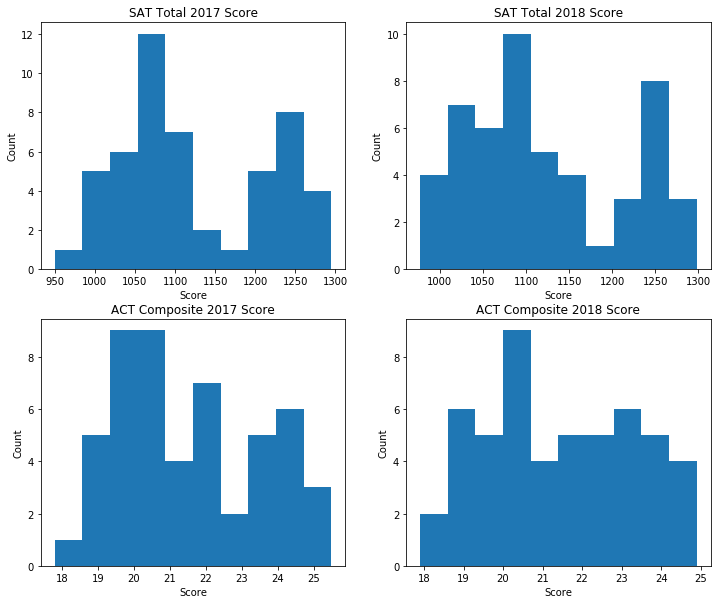

In [202]:
subplot_histograms(final, 
                   list_of_columns=['total_s17', 'total_s18', 
                           'composite_a17', 'composite_a18'], 
                   list_of_titles=['SAT Total 2017 Score', 'SAT Total 2018 Score', 'ACT Composite 2017 Score', 
                                  'ACT Composite 2018 Score'], 
                   list_of_xlabels=['Score', 'Score','Score','Score'],
#                    
                   list_of_ylabels=['Count','Count','Count','Count','Count']
                   )

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'Scatter plot SAT vs. ACT Math 2017')

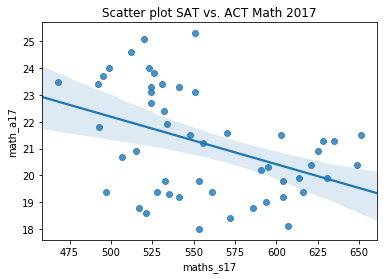

In [222]:
ax = sns.regplot(final.maths_s17, final.math_a17, final)
plt.title('Scatter plot SAT vs. ACT Math 2017')




Text(0.5, 1.0, 'SAT vs. ACT verbal/reading scores')

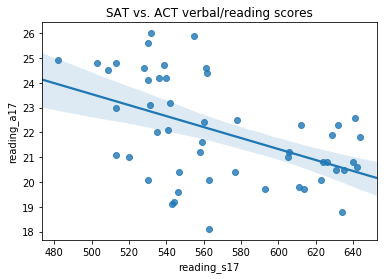

In [229]:
#SAT vs. ACT verbal/reading scores for 2017
#scatter(final.reading_s17, final.reading_a17,'SAT vs. ACT verbal/reading scores', 'SAT2017', 'ACT2017')

ax = sns.regplot(final.reading_s17, final.reading_a17, final)
plt.title('SAT vs. ACT verbal/reading scores')

Text(0.5, 1.0, 'SAT vs. ACT total/composite scores')

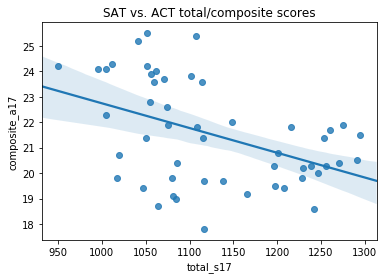

In [233]:
#SAT vs. ACT total/composite scores for 2017

#scatter(final.total_s17, final.composite_a17,'SAT vs. ACT total/composite scores', 'SAT2017', 'ACT2017')

ax = sns.regplot(final.total_s17, final.composite_a17, final)
plt.title('SAT vs. ACT total/composite scores')

Text(0.5, 1.0, 'Total scores for SAT 2017 vs. 2018')

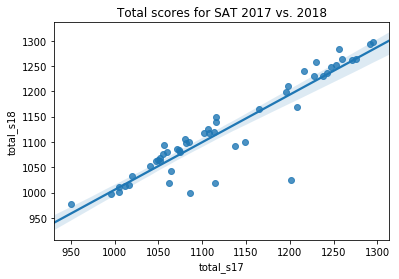

In [234]:
#Total scores for SAT 2017 vs. 2018

#scatter(final.total_s17, final.total_s18,'SAT 2017 vs. SAT 2018 Total scores', 'SAT2017', 'SAT2018')

ax = sns.regplot(final.total_s17, final.total_s18, final)
plt.title('Total scores for SAT 2017 vs. 2018')

Text(0.5, 1.0, 'Composite scores for ACT 2017 vs. 2018')

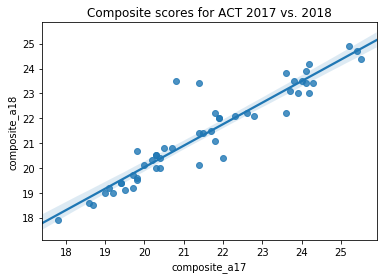

In [236]:
#Composite scores for ACT 2017 vs. 2018
#scatter(final.composite_a17, final.composite_a18,'ACT 2017 vs. ACT 2018 Composite scores', 'ACT2017', 'ACT2018')

ax = sns.regplot(final.composite_a17, final.composite_a18, final)
plt.title('Composite scores for ACT 2017 vs. 2018')


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

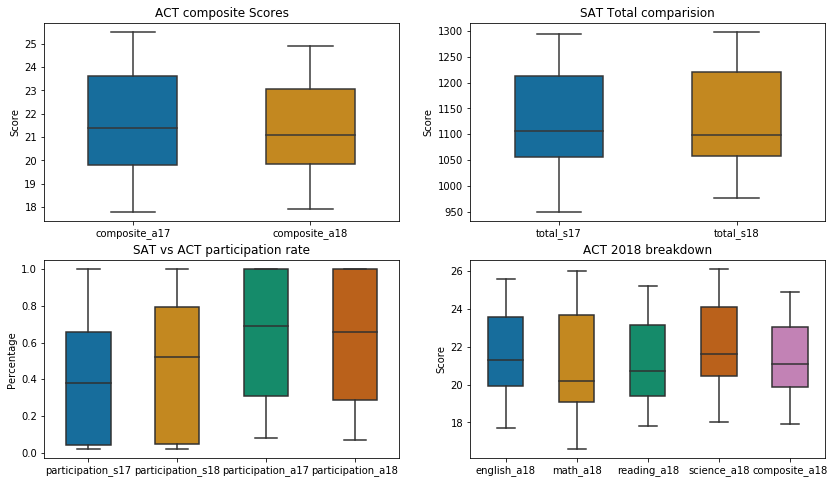

In [199]:
# Code
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
# SAT participation trend vs ACT participation trend
bplot = sns.boxplot(data=final[['participation_s17','participation_s18', 'participation_a17', 'participation_a18']],width=0.5,palette="colorblind", ax = ax[1,0]).set_title('SAT vs ACT participation rate')
ax[1,0].set_ylabel('Percentage')
# SAT total score comparision
bplot2 = sns.boxplot(data=final[['total_s17', 'total_s18']],width=0.5,palette="colorblind", ax = ax[0,1]).set_title('SAT Total comparision')
ax[0,1].set_ylabel('Score')
# ACT composite comparision
bplot3 =sns.boxplot(data=final[['composite_a17', 'composite_a18']],width=0.5,palette="colorblind", ax = ax[0,0]).set_title('ACT composite Scores')
ax[0,0].set_ylabel('Score')                                                                                                            
bplot4 =sns.boxplot(data=final[['english_a18','math_a18', 'reading_a18', 'science_a18', 'composite_a18']],width=0.5,palette="colorblind", ax = ax[1,1]).set_title('ACT 2018 breakdown')
ax[1,1].set_ylabel('Score')
plt.show()



#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [71]:
#figsize=(30, 30)
#plt.plot( 'participation_s17', 'state', data=final, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=4)
#plt.plot( 'participation_s18', 'state', data=final, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.plot( 'participation_s18', 'y2', data=final, marker='', color='olive', linewidth=2)
#plt.plot( 'participation_a18', 'y3', data=final, marker='', color='green', linewidth=2, linestyle='dashed', label="toto")
#plt.legend()



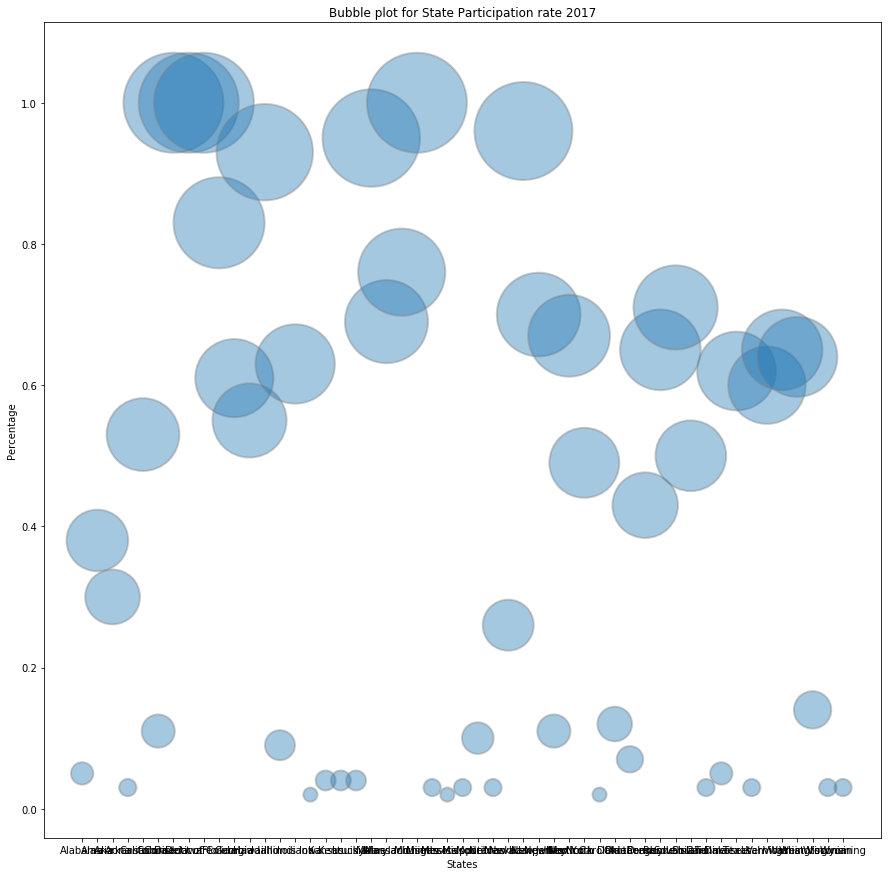

In [72]:

fig, ax = plt.subplots(figsize=(15, 15))
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x = final['state'], y = final['participation_s17'], s=final['participation_s17']*10000, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("States")
plt.ylabel("Percentage")
plt.title("Bubble plot for State Participation rate 2017")
# Update state names to short for eg. New York to NY
plt.show()
# Max and Min participation within a state is easily observed in this chart


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.


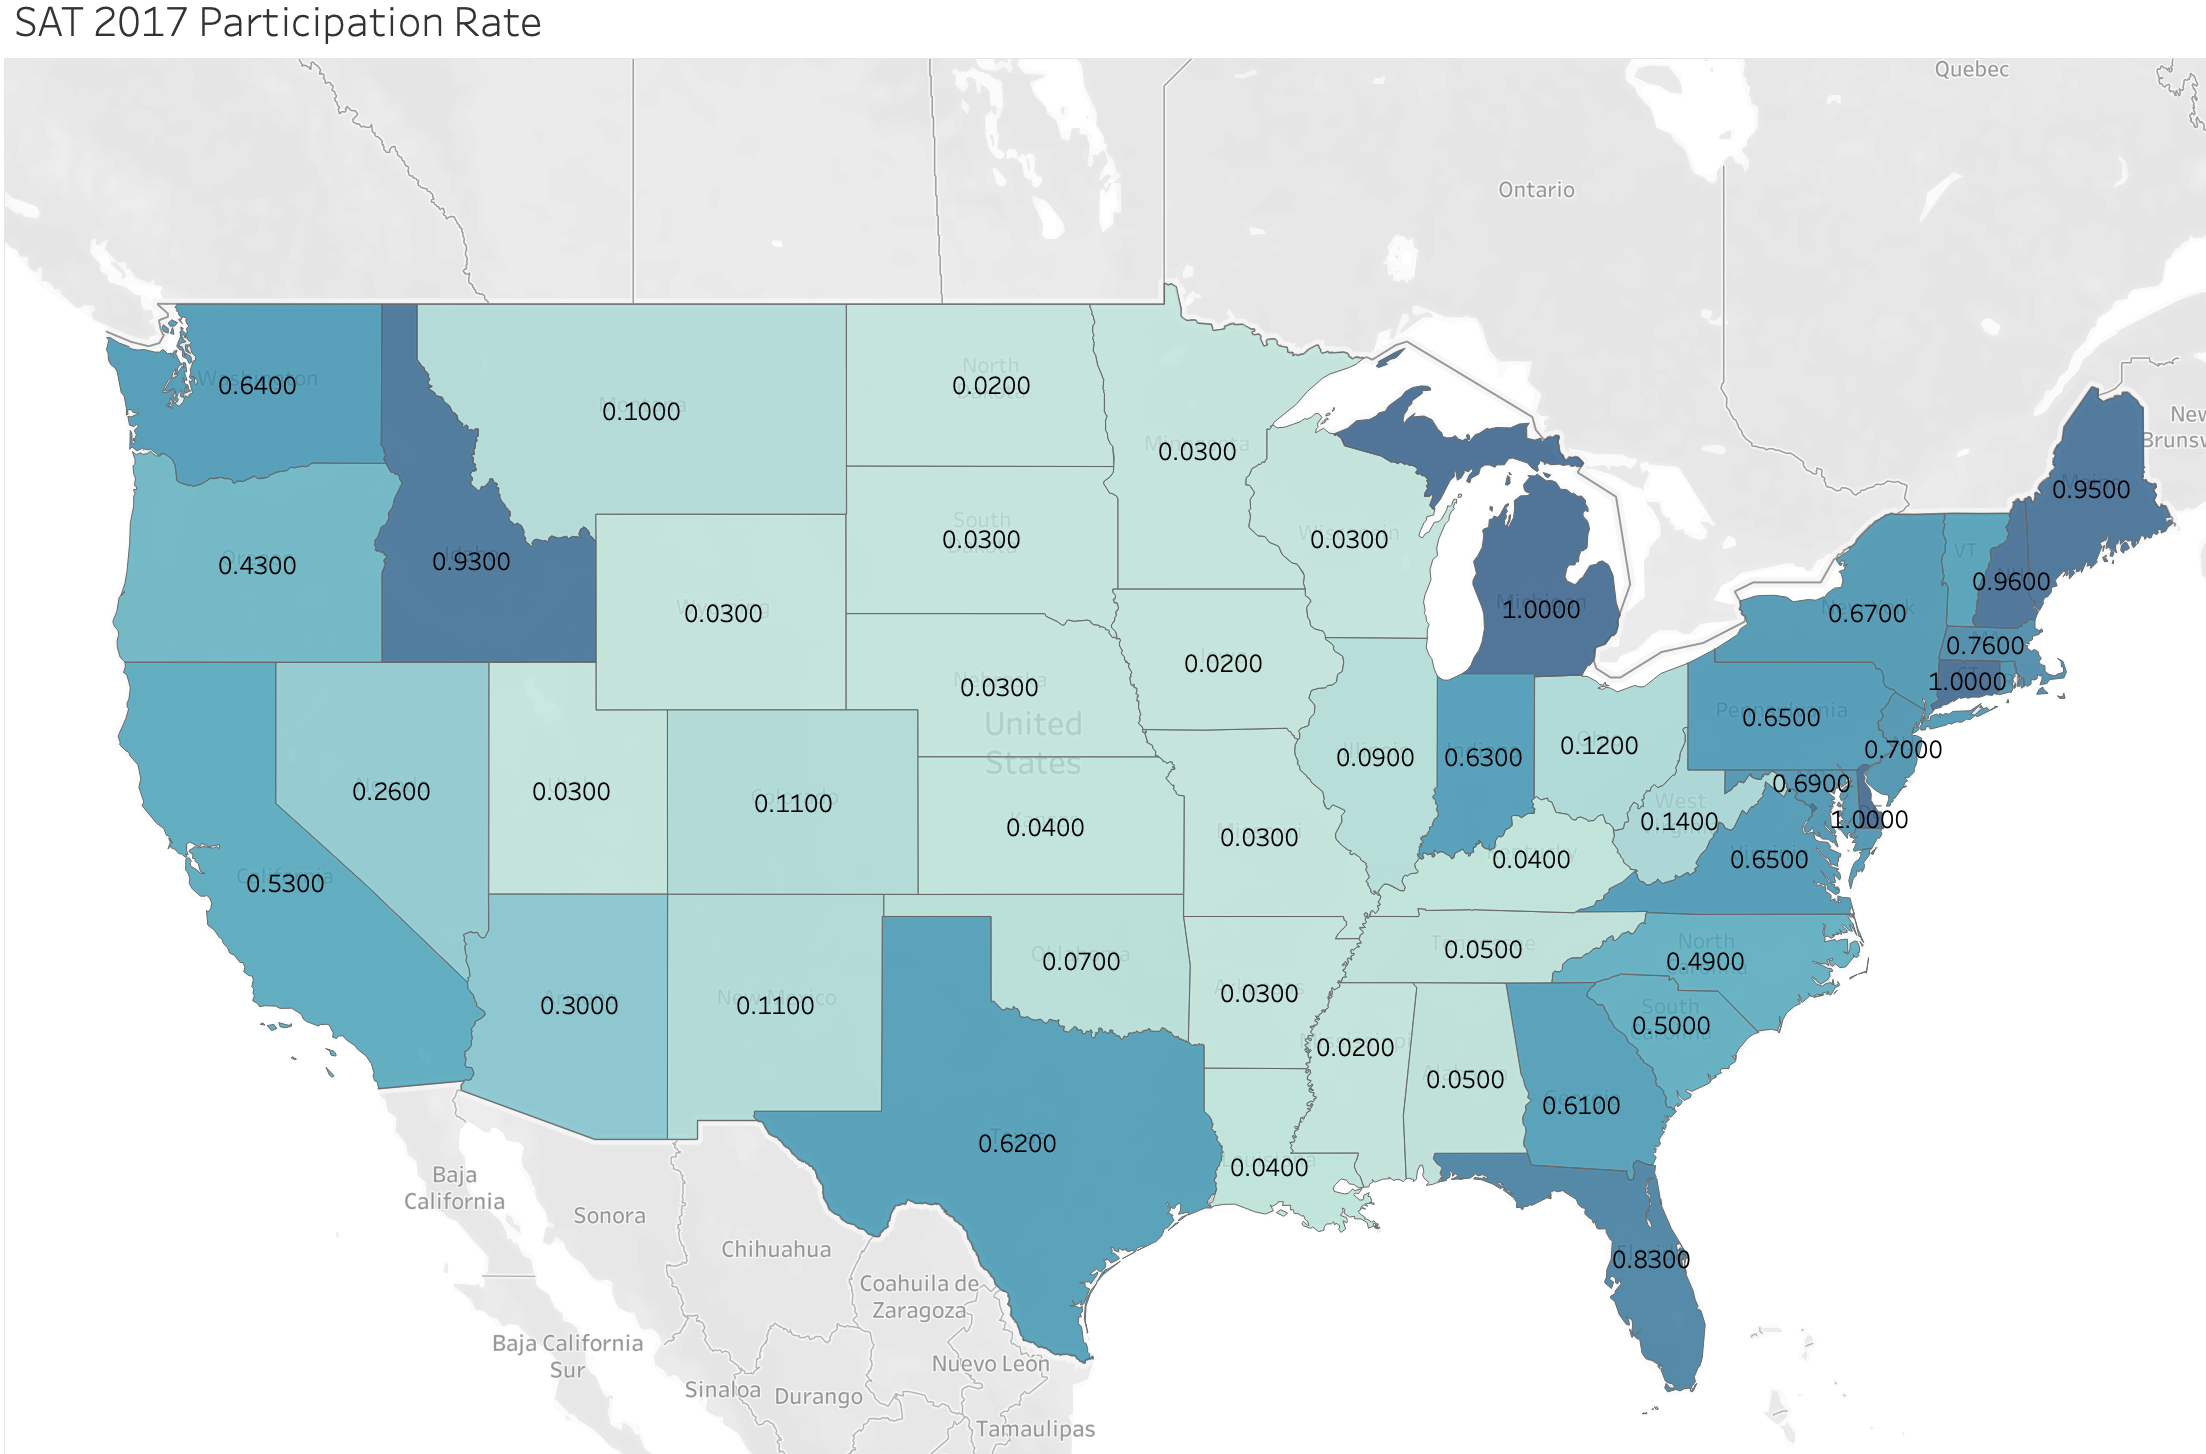



SAT 2018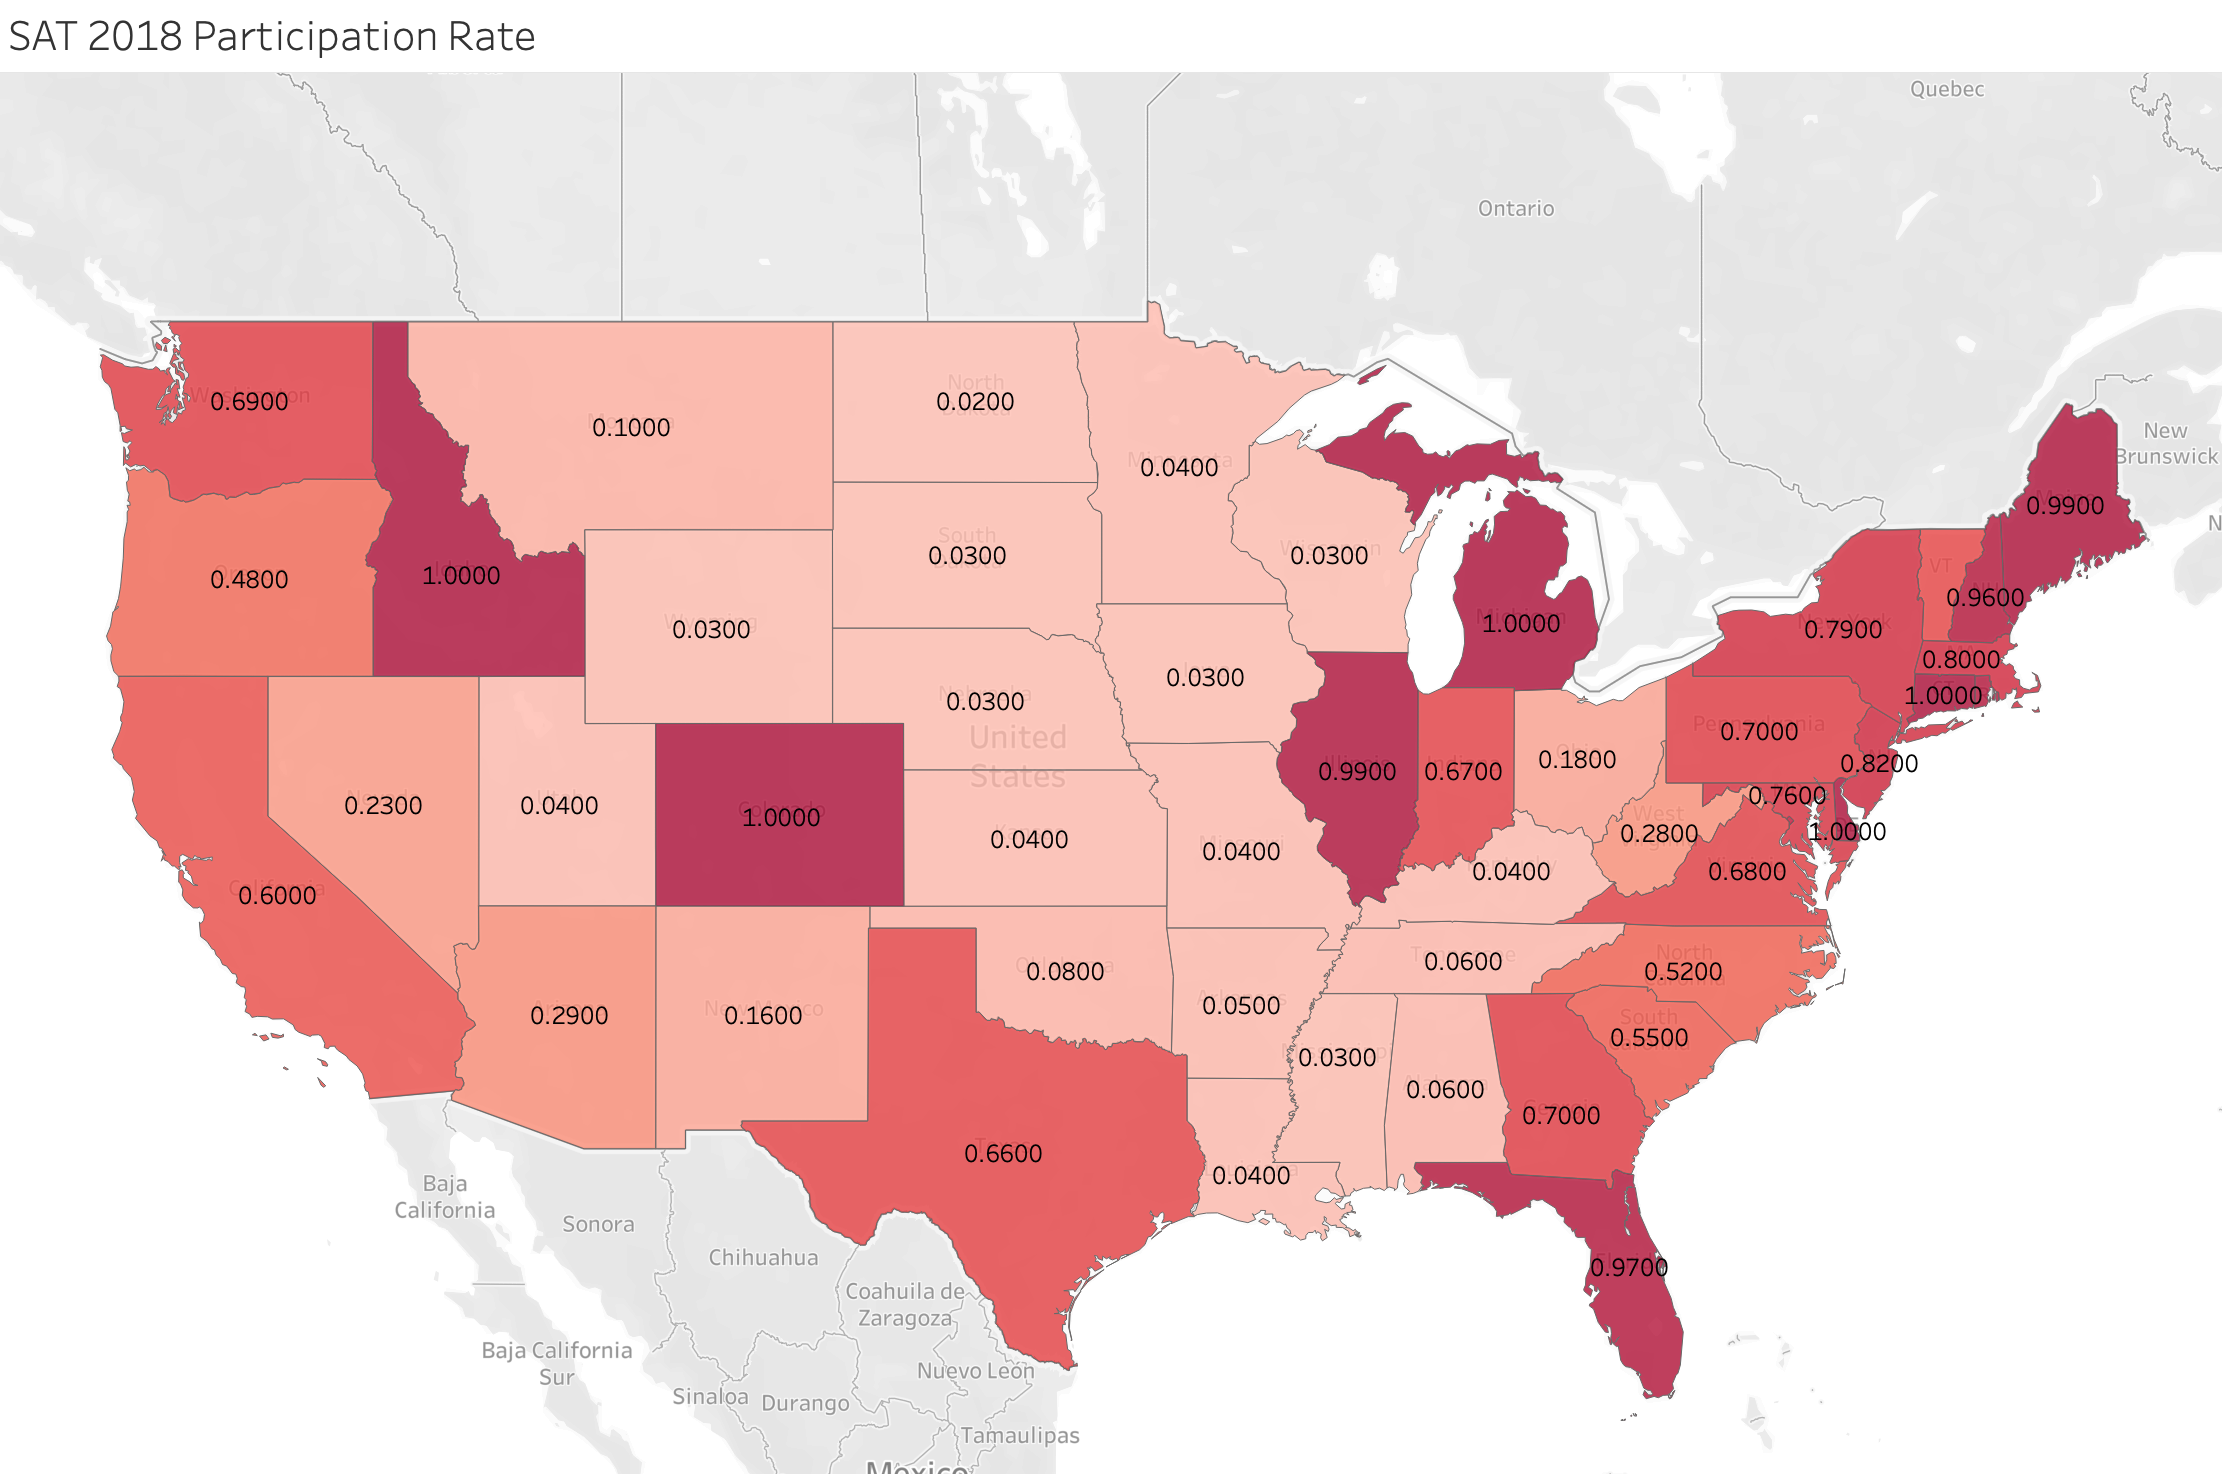


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.


While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [73]:
final.describe()

participation_s17  reading_s17   maths_s17    total_s17  \
count          51.000000    51.000000   51.000000    51.000000   
mean            0.398039   569.117647  556.882353  1126.098039   
std             0.352766    45.666901   47.121395    92.494812   
min             0.020000   482.000000  468.000000   950.000000   
25%             0.040000   533.500000  523.500000  1055.500000   
50%             0.380000   559.000000  548.000000  1107.000000   
75%             0.660000   613.000000  599.000000  1212.000000   
max             1.000000   644.000000  651.000000  1295.000000   

       participation_a17  english_a17   math_a17  reading_a17  science_a17  \
count          51.000000    51.000000  51.000000    51.000000    51.000000   
mean            0.652549    20.931373  21.182353    22.013725    21.447059   
std             0.321408     2.353677   1.981989     2.067271     1.735552   
min             0.080000    16.300000  18.000000    18.100000    18.200000   
25%             0.310000    19.000000  19.400000    20.450000    19.950000   
50%             0.690000    20.700000  20.900000    21.800000    21.300000   
75%             1.000000    23.300000  23.100000    24.150000    23.100000   
max             1.000000    25.500000  25.300000    26.000000    24.900000   

       composite_a17  ...   maths_s18    total_s18  participation_a18  \
count      51.000000  ...   51.000000    51.000000          51.000000   
mean       21.519608  ...  557.039216  1124.019608           0.616471   
std         2.020695  ...   49.065654    94.277779           0.340810   
min        17.800000  ...  480.000000   977.000000           0.070000   
25%        19.800000  ...  520.000000  1057.500000           0.285000   
50%        21.400000  ...  547.000000  1099.000000           0.660000   
75%        23.600000  ...  600.500000  1220.000000           1.000000   
max        25.500000  ...  655.000000  1298.000000           1.000000   

       english_a18   math_a18  reading_a18  science_a18  composite_a18  \
count    51.000000  51.000000    51.000000    51.000000      51.000000   
mean     21.486275  20.988235    21.125490    22.015686      21.345098   
std       2.106278   2.446356     2.035765     2.167245       1.870114   
min      17.700000  16.600000    17.800000    18.000000      17.900000   
25%      19.950000  19.100000    19.400000    20.450000      19.850000   
50%      21.300000  20.200000    20.700000    21.600000      21.100000   
75%      23.550000  23.700000    23.150000    24.100000      23.050000   
max      25.600000  26.000000    25.200000    26.100000      24.900000   

       participation_schange  participation_achange  
count              51.000000              51.000000  
mean               -0.068235               0.036078  
std                 0.176643               0.134478  
min                -0.900000              -0.250000  
25%                -0.050000               0.000000  
50%                -0.020000               0.010000  
75%                 0.000000               0.040000  
max                 0.080000               0.700000  

[8 rows x 22 columns]

Answers:

participation_s17:
Mean = 0.398039 
Median = 0.380000
Range = 0.98 (How spread out your data is)
Interquartile = 0.62 ( "50" percent of the data)
skewed = Positive skew


* Repeat for all colums

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Normal distribution is not observed in most of the distributions. We do see normal distributions in our ACT Composite and SAT Total scores for both years.

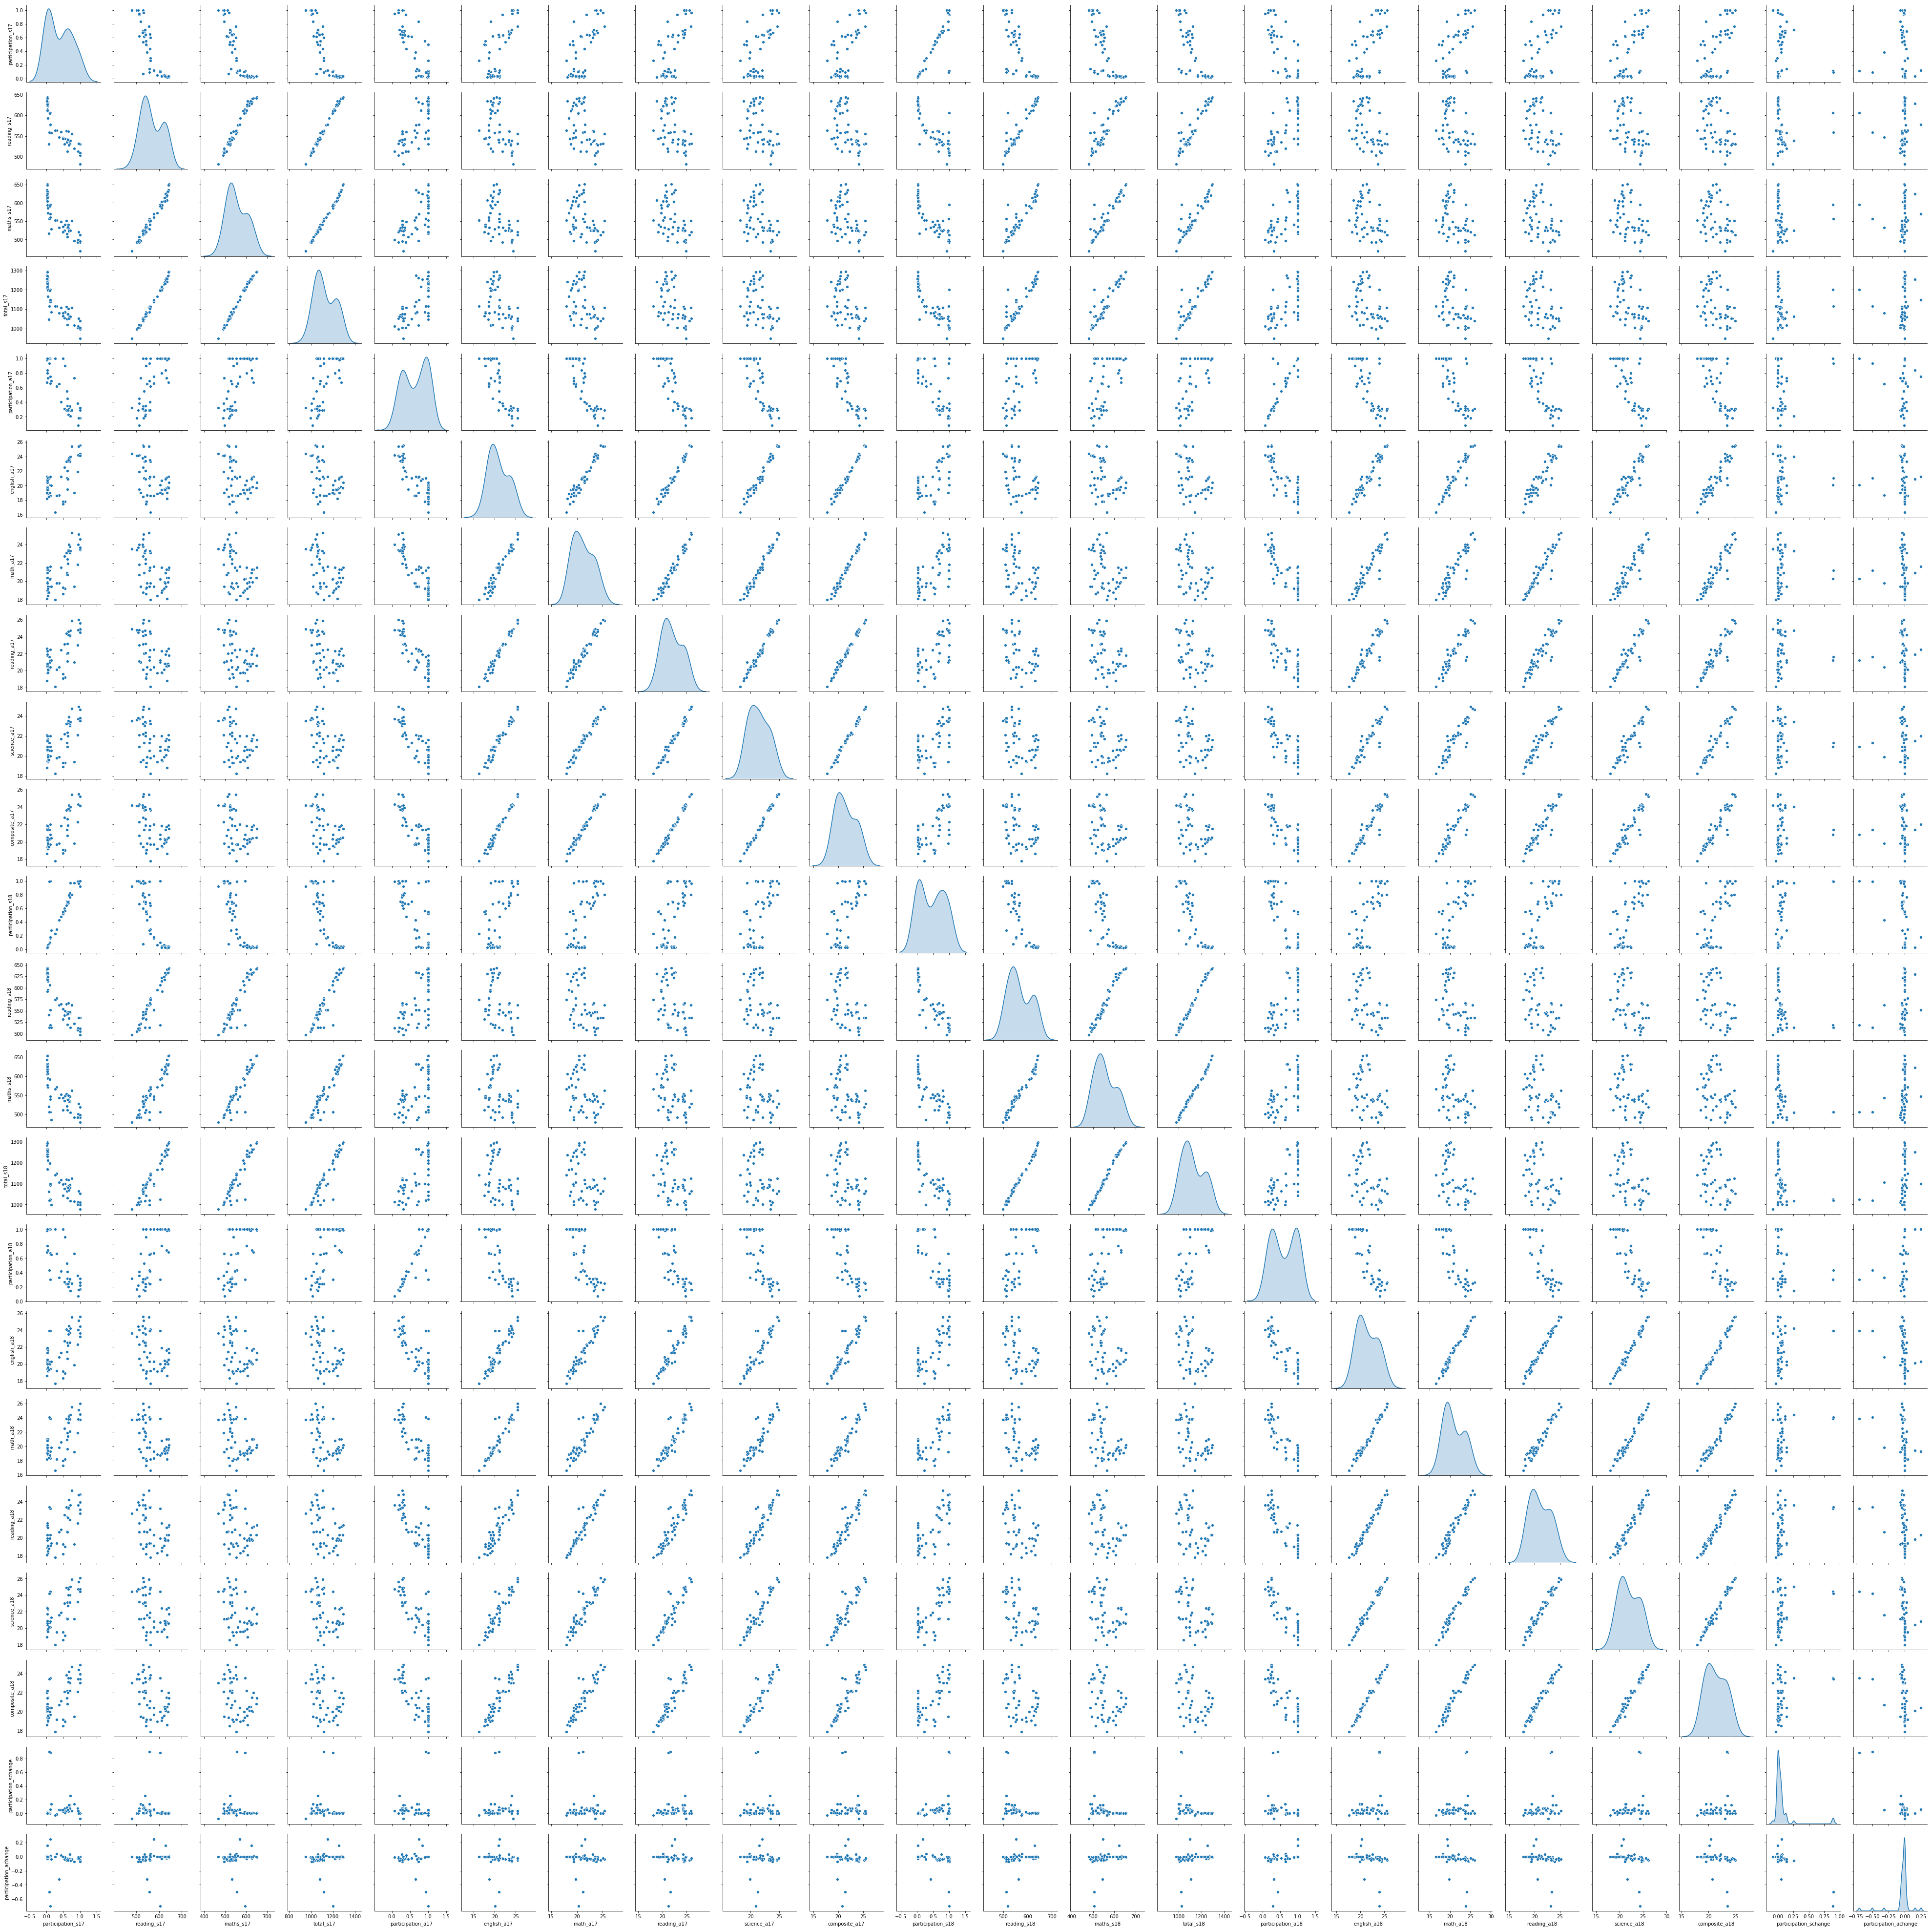

In [171]:
sns.pairplot(final, diag_kind='kde')

Answer: SAT & ACT data are not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: SAT/ACT math syllabus and difficulty level might differ. Eg. SAT math focuses on problem solving data and advanced math, ACT focus on Algebra, geometry and trigonometry. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Some states requires all students to take the ACT or SAT.

There are 14 states that require the ACT:
- Alabama
- Kentucky
- Louisiana
- Mississippi
- Missouri
- Montana
- Nebraska
- Nevada
- North Carolina
- South Carolina
- Utah
- Winsconsin
- Wyoming

And there are 8 states/regions that require the SAT:
- Colorado (Mandatory in 2018: Transition from ACT to SAT)
- Connecticut
- Delaware
- District of Columbia
- Illinois(Mandatory in 2017: Transition from ACT to SAT)
- Maine
- Michigan
- New Hampshire

22 out of 50 states in US requires SAT or ACT for college admission and it is reflective in both datas. Students in Idaho, Ohio, Tennessee have a choice of chosing either exams for admission. 

Source: 
https://blog.prepscholar.com/act-vs-sat
https://www.usnews.com/education/best-colleges/articles/2018-01-23/how-to-take-the-sat-act-for-free
https://blog.prepscholar.com/which-states-require-the-sat
https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html

In [209]:
#states that requires ACT
actstates = ['Alabama', 'Kentucky','Louisiana','Mississippi', 'Missouri', 'Montana',
             'Nebraska', 'Nevada', 'North Carolina', 'South Carolina', 'Utah', 
             'Winsconsin', 'Wyoming']
#States that requires SAT
satstates = ['Colorado', 'Connecticut','Delaware','District of Columbia', 'Illinois', 'Maine',
             'Michigan', 'New Hampshire']
# states that can choose SAT or ACT
satact = ['Idaho', 'Ohio', 'Tennessee']
# remaining states
lessstates = ['Alaska','Arizona','California','Florida','Georgia','Indiana','Iowa',
 'Kansas','Maryland','Massachusetts','Minnesota','New Jersey','New Mexico',
 'New York','North Dakota','Oregon','Pennsylvania','Rhode Island','South Dakota',
 'Texas','Vermont','Virginia','Washington']

maskact = final['state'].isin(actstates)
masksat = final['state'].isin(satstates)
masksatact = final['state'].isin(satact)
maskless = final['state'].isin(lessstates)
 
display(final[maskact].loc[:, ['state','participation_a17', 'participation_a18']].sort_values(by='participation_a17'))
display(final[masksat].loc[:, ['state','participation_s17', 'participation_s18']].sort_values(by='participation_s17'))
display(final[masksatact].loc[:, ['state','participation_a17', 'participation_a18']].sort_values(by='participation_a17'))
display(final[masksatact].loc[:, ['state','participation_s17', 'participation_s18']].sort_values(by='participation_s17'))
display(final[maskless].loc[:, ['state','participation_s17', 'participation_s18', 'participation_a17', 'participation_a18']].sort_values(by='participation_s17'))


state  participation_a17  participation_a18
27        Nebraska               0.84                1.0
0          Alabama               1.00                1.0
17        Kentucky               1.00                1.0
18       Louisiana               1.00                1.0
24     Mississippi               1.00                1.0
25        Missouri               1.00                1.0
26         Montana               1.00                1.0
28          Nevada               1.00                1.0
33  North Carolina               1.00                1.0
40  South Carolina               1.00                1.0
44            Utah               1.00                1.0
50         Wyoming               1.00                1.0

state  participation_s17  participation_s18
13              Illinois               0.09               0.99
5               Colorado               0.11               1.00
19                 Maine               0.95               0.99
29         New Hampshire               0.96               0.96
6            Connecticut               1.00               1.00
7               Delaware               1.00               1.00
8   District of Columbia               1.00               0.92
22              Michigan               1.00               1.00

state  participation_a17  participation_a18
12      Idaho               0.38               0.36
35       Ohio               0.75               1.00
42  Tennessee               1.00               1.00

state  participation_s17  participation_s18
42  Tennessee               0.05               0.06
35       Ohio               0.12               0.18
12      Idaho               0.93               1.00

state  participation_s17  participation_s18  participation_a17  \
15           Iowa               0.02               0.03               0.67   
34   North Dakota               0.02               0.02               0.98   
41   South Dakota               0.03               0.03               0.80   
23      Minnesota               0.03               0.04               1.00   
16         Kansas               0.04               0.04               0.73   
31     New Mexico               0.11               0.16               0.66   
2         Arizona               0.30               0.29               0.62   
1          Alaska               0.38               0.43               0.65   
37         Oregon               0.43               0.48               0.40   
4      California               0.53               0.60               0.31   
45        Vermont               0.60               0.64               0.29   
10        Georgia               0.61               0.70               0.55   
43          Texas               0.62               0.66               0.45   
14        Indiana               0.63               0.67               0.35   
47     Washington               0.64               0.69               0.29   
46       Virginia               0.65               0.68               0.29   
38   Pennsylvania               0.65               0.70               0.23   
32       New York               0.67               0.79               0.31   
20       Maryland               0.69               0.76               0.28   
30     New Jersey               0.70               0.82               0.34   
39   Rhode Island               0.71               0.97               0.21   
21  Massachusetts               0.76               0.80               0.29   
9         Florida               0.83               0.97               0.73   

    participation_a18  
15               0.68  
34               0.98  
41               0.77  
23               0.99  
16               0.71  
31               0.67  
2                0.66  
1                0.33  
37               0.42  
4                0.27  
45               0.24  
10               0.53  
43               0.41  
14               0.32  
47               0.24  
46               0.24  
38               0.20  
32               0.27  
20               0.31  
30               0.31  
39               0.15  
21               0.25  
9                0.66

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?


Conclusions: 

While reviewing ACT and SAT participation data from 2017 and 2018, as well state laws regarding testing requirements, we recommend that the College Board prioritize its marketing and lobbying efforts in New Mexico.
New Mexico saw an increase from 11% SAT participation in 2017 to 16% in 2018 and still leaves a major room for growth. This contrasts with an ACT participation rate that had a slight increase from 66% to 67%. A slow down in growth in ACT might be due to the neighbouring state, Colorado's transition from ACT to SAT.

Recommendations:

1) Invest in marketing efforts

New Mexico is a state where students have the freedom to choose the college exam they prefer, or to skip it altogether. With this, there is a contingent of potential customers still untapped by the ACT exam that may be reached by effective communication.

2) Leveraing on past successes

Lobbying and marketing efforts should make use of trends in Texas and Colorado, where SAT participation rates are on a upward trend . This momentum can be harnessed to increase SAT participation rates across the region.





